## Fetching the Data and Imports


In [1]:
!git clone https://github.com/sergivalverde/MAIA_seminar.git
!pip install https://github.com/ANTsX/ANTsPy/releases/download/v0.1.8/antspy-0.1.7-cp36-cp36m-linux_x86_64.whl
!pip install statsmodels
!pip install segmentation-models-pytorch

import os
import random
import torch
import ants
import numpy as np
import nibabel as nib
options = {}

# training data path
options['training_path'] = 'Training_Set'

# validation data path 
options['val_path'] = 'Validation_Set'

# testing data path 
options['test_path'] = 'Test_Set'

Cloning into 'MAIA_seminar'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 67 (delta 23), reused 56 (delta 13), pack-reused 0
Unpacking objects: 100% (67/67), done.
     |████████████████████████████████| 255.7MB 55kB/s 
     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 61kB 5.2MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60963 sha256=22b295b48f97bdc2cae53ced1a28cf7d0e09fcaaa3a40a9135947b0defdf2525
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.5.1-cp36-none-any.whl size=11768 sha256=3b262b0c8205081a89ab73e9887c90d4d2a769101df060a4e14c0562a77d0678
  Stored in directory: /root/.cache/pip/wheels/52/0c/8e/58d91f29f0f8cbb45231a145312939a5423dc82c61cc731361
Suc

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
Using TensorFlow backend.


In [2]:

%load_ext autoreload
%autoreload 2

file_id_gdrive = "1m_lhgn-jiNj9mXx3AO87pZ0fr4un_GVS"
!git clone https://github.com/chentinghao/download_google_drive.git
%cd download_google_drive
!python download_gdrive.py $file_id_gdrive /content/data.zip
%cd /content/
!unzip data.zip

options = {}

# training data path
options['training_path'] = 'Training_Set'

# validation data path 
options['val_path'] = 'Validation_Set'

# testing data path 
options['test_path'] = 'Test_Set'

# additional options for patch size, sampling step, normalization, etc...
options['patch_size'] = (32, 32, 32)
options['sampling_step'] = (32, 32, 32)
options['normalize'] = True 
options['batch_size'] = 32
options['verbose'] = False
options['roi'] = 'brainmask.nii.gz'
options['patience'] = 30



Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
/content/download_google_drive
20.8MB [00:00, 40.7MB/s]
/content
Archive:  data.zip
   creating: Test_Set/
   creating: Test_Set/IBSR_15/
  inflating: Test_Set/IBSR_15/IBSR_15.nii.gz  
   creating: Test_Set/IBSR_10/
  inflating: Test_Set/IBSR_10/IBSR_10.nii.gz  
   creating: Test_Set/IBSR_02/
  inflating: Test_Set/IBSR_02/IBSR_02.nii.gz  
   creating: Training_Set/
   creating: Training_Set/IBSR_05/
  inflating: Training_Set/IBSR_05/IBSR_05.nii.gz  
  inflating: Training_Set/IBSR_05/IBSR_05_seg.nii.gz  
   creating: Training_Set/IBSR_07/
  inflating: Training_Set/IBSR_07/IBSR_07_seg.nii.gz  
  inflating: Training_Set/IBSR_07/IBSR_07.nii.gz  
   creating: Training_Set/IBSR_03/
  inflating: Training_Set/IBSR_03/IBSR_03.nii.gz  
  inflating: Training_Set/IBSR_03/IBSR_03_seg.nii.gz  
   creating: Training_Set/IB

## Generating Coronal and Axial Data

In [0]:
!mkdir new_data
!mkdir /content/new_data/Training_Set
!mkdir /content/new_data/Training_Set/Images
!mkdir /content/new_data/Training_Set/Masks
!mkdir /content/new_data/Validation_Set
!mkdir /content/new_data/Validation_Set/Images
!mkdir /content/new_data/Validation_Set/Masks
!mkdir /content/new_data/Validation_Set/orig

## Generating 2.5 D Data

/content
IBSR_06.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


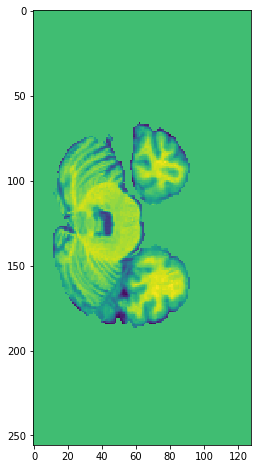

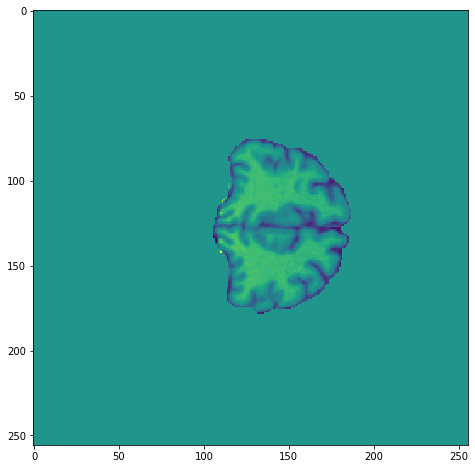

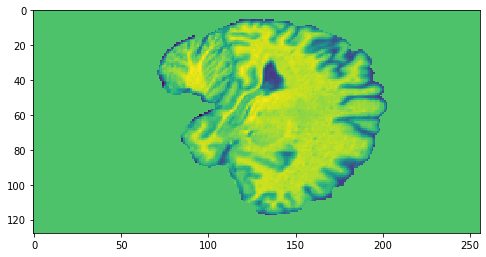

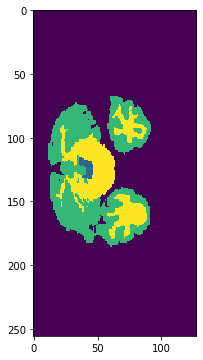

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


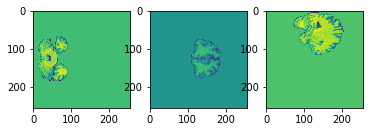

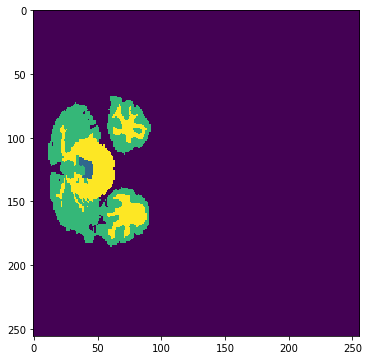

IBSR_09.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


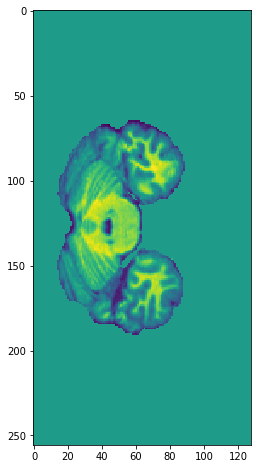

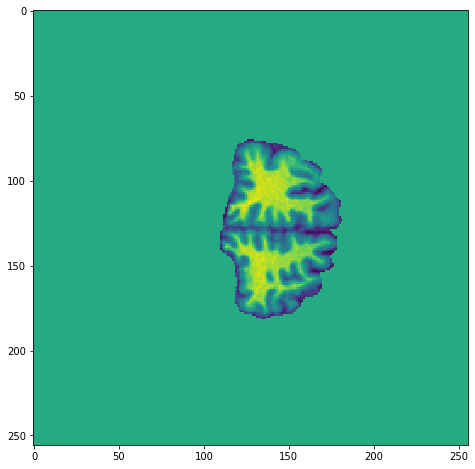

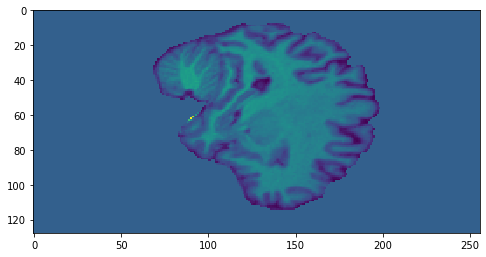

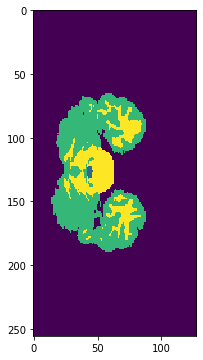

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


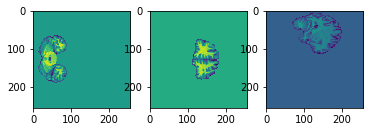

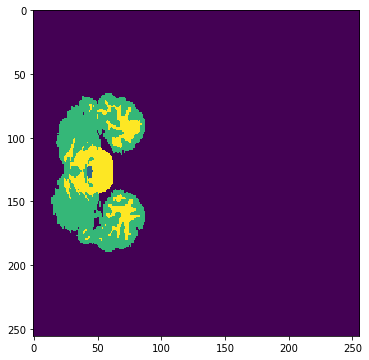

IBSR_18.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


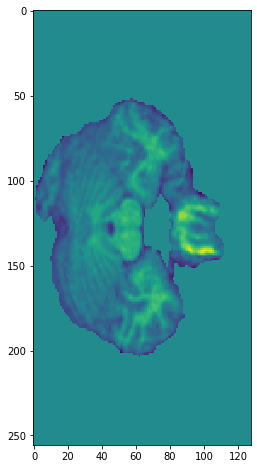

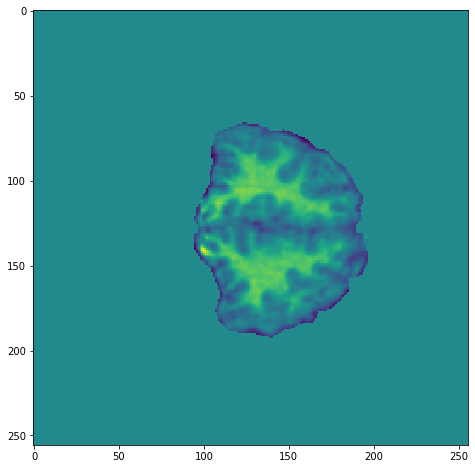

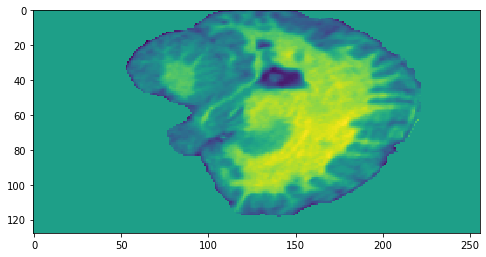

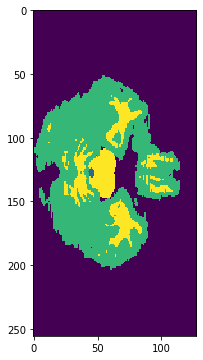

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


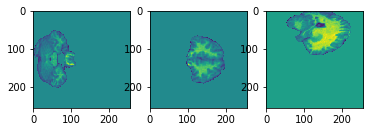

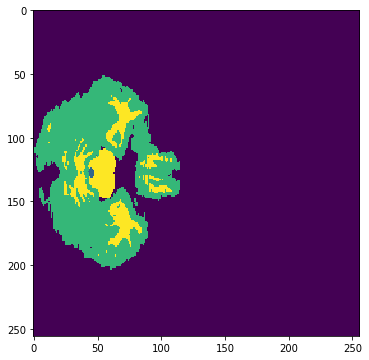

IBSR_07.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


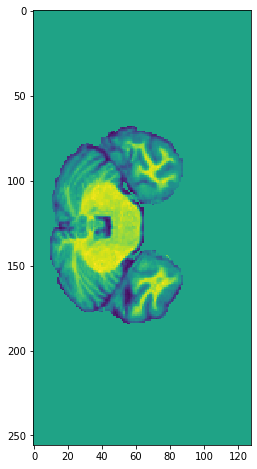

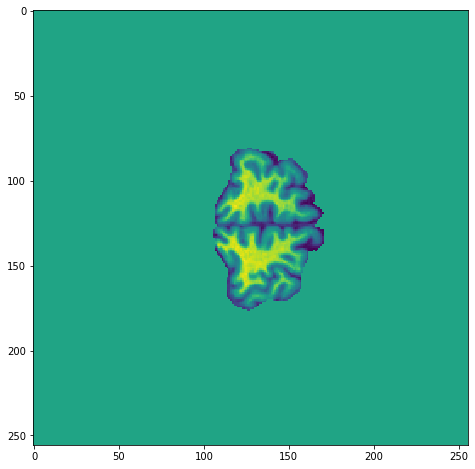

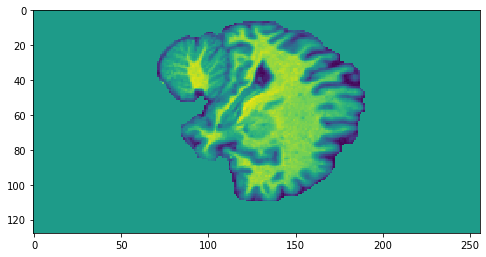

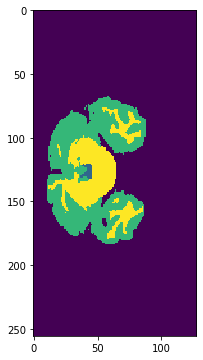

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


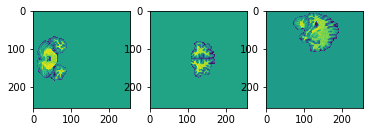

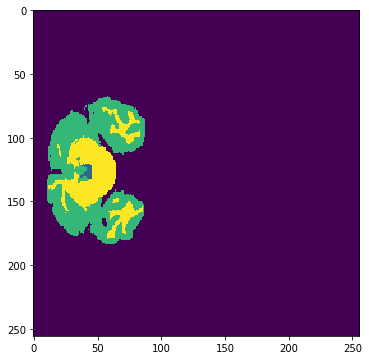

IBSR_03.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


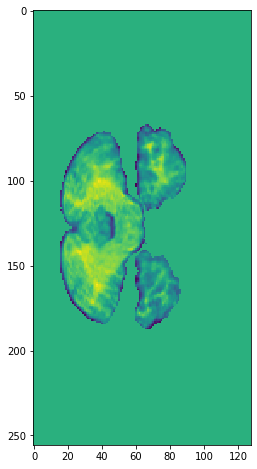

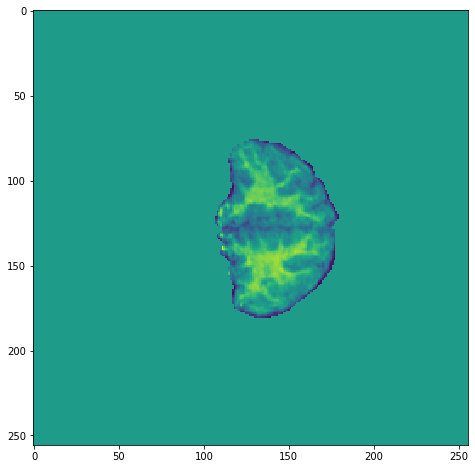

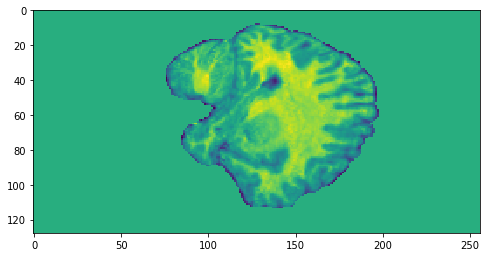

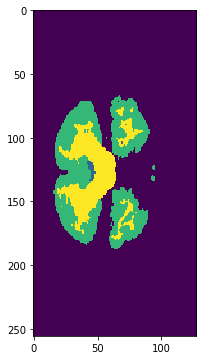

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


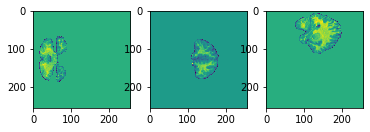

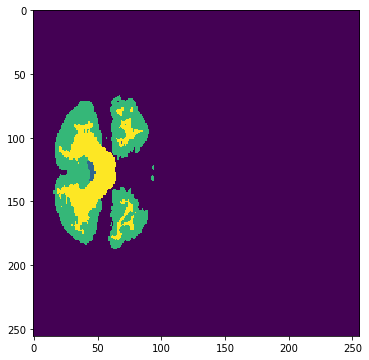

IBSR_05.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


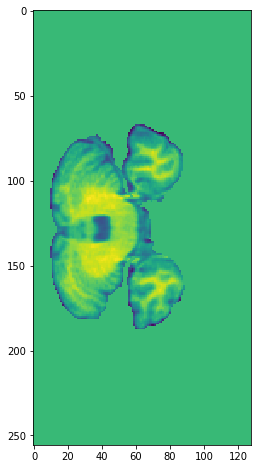

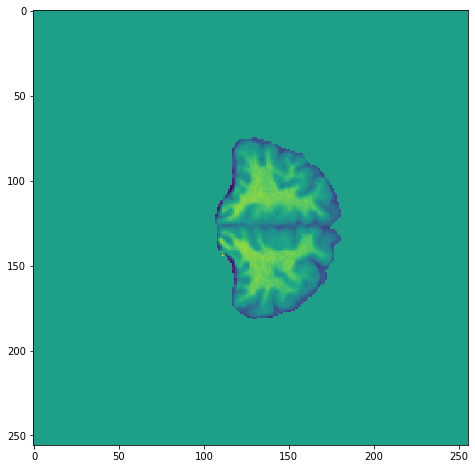

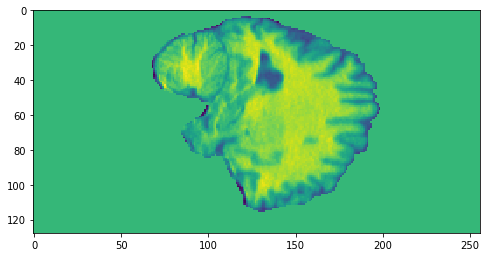

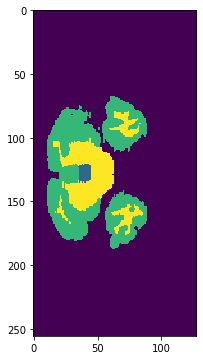

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


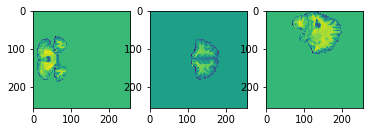

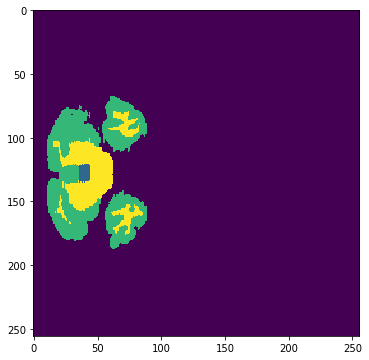

IBSR_04.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


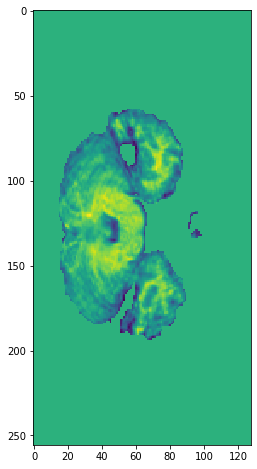

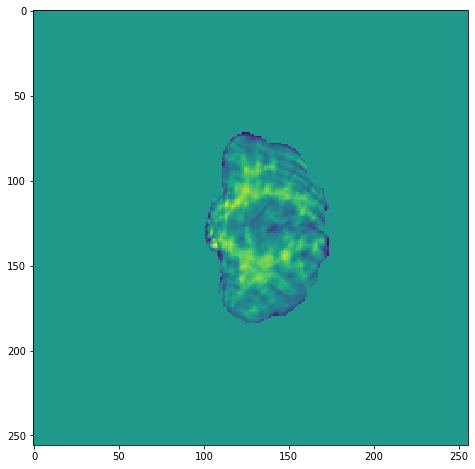

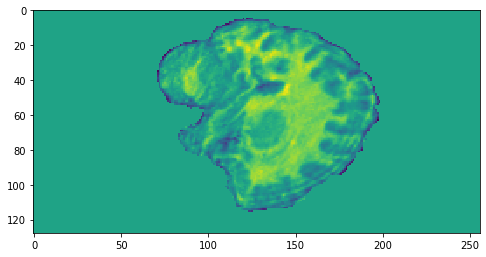

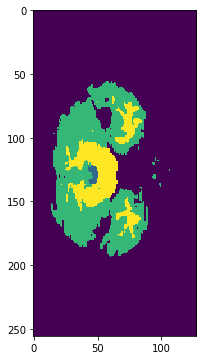

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


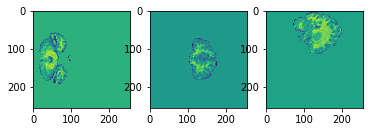

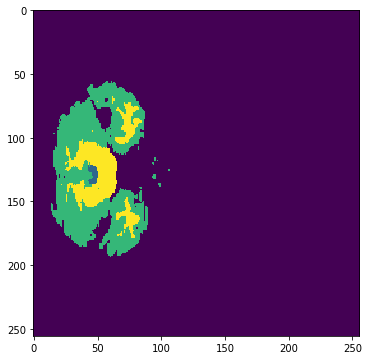

IBSR_01.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


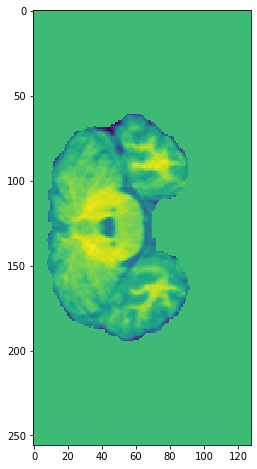

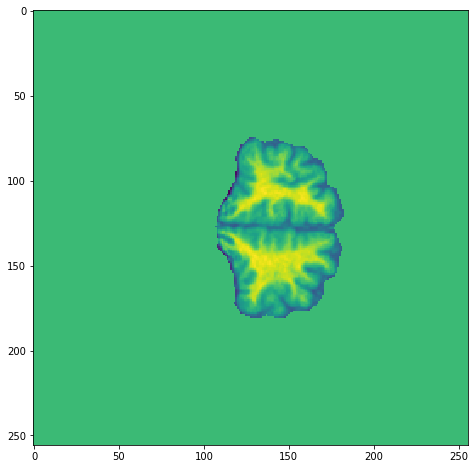

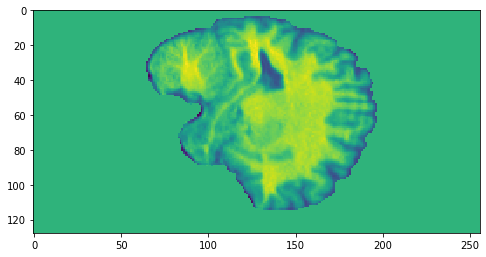

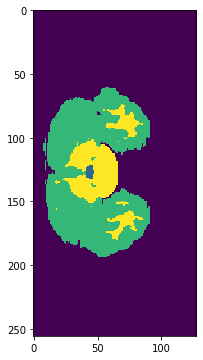

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


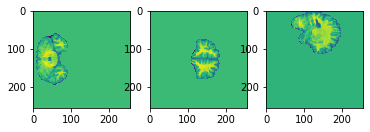

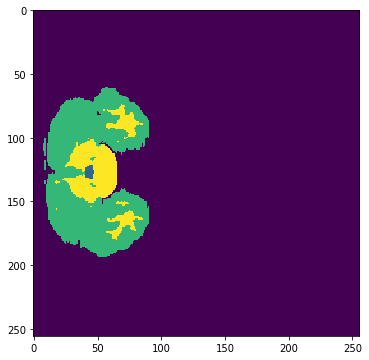

IBSR_16.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


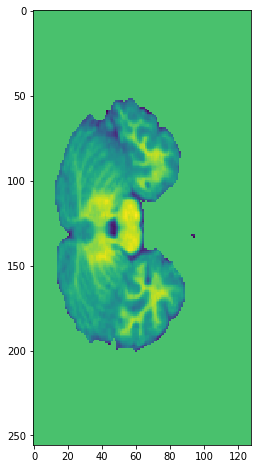

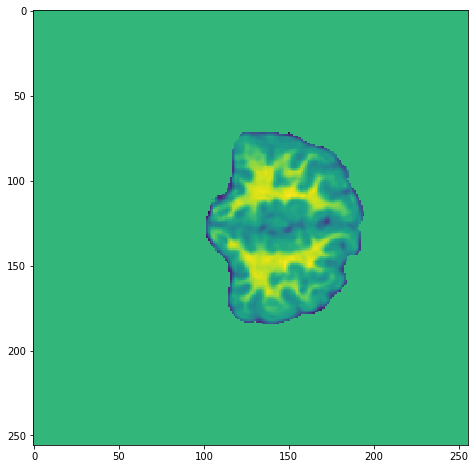

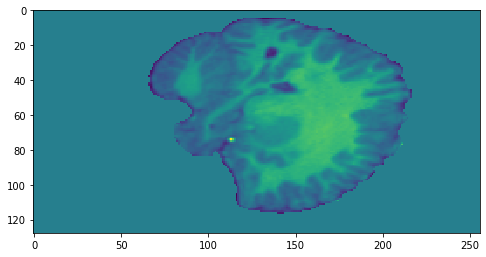

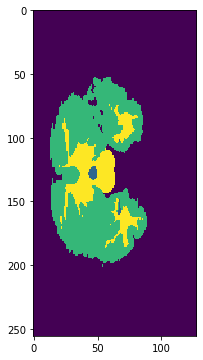

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


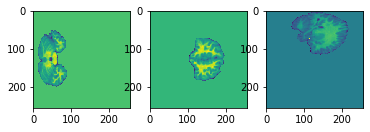

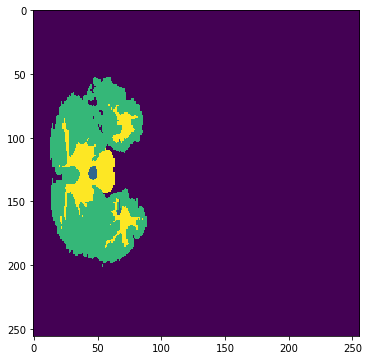

IBSR_08.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


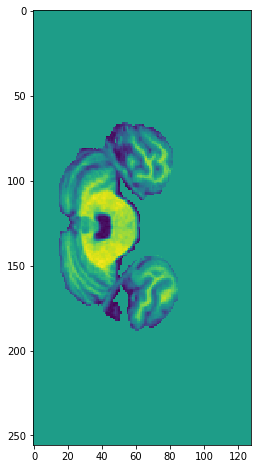

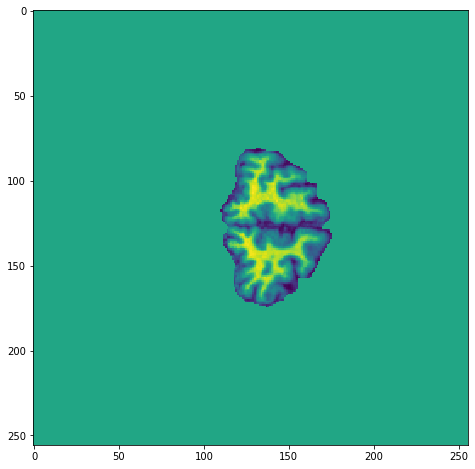

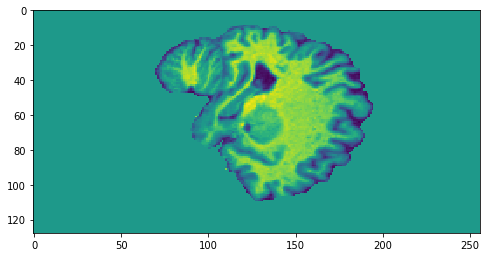

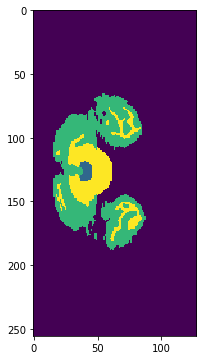

(1, 256, 256, 256)
DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


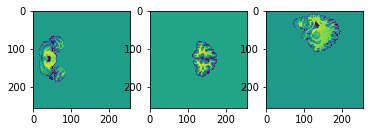

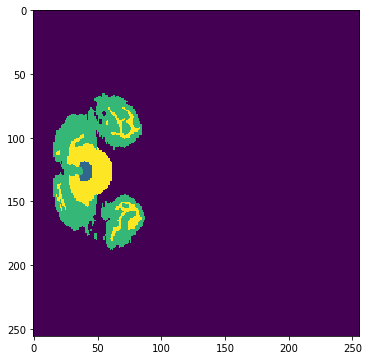

IBSR_13.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


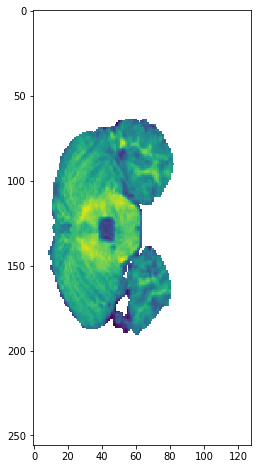

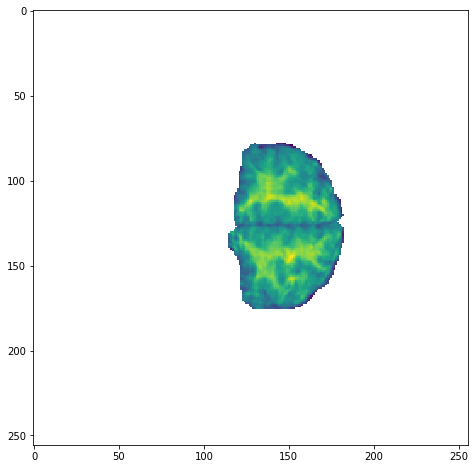

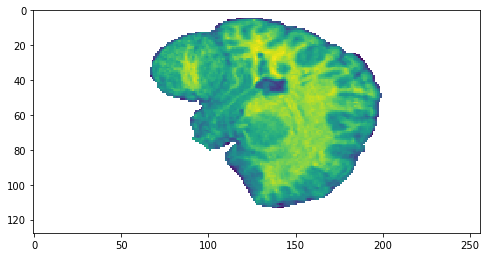

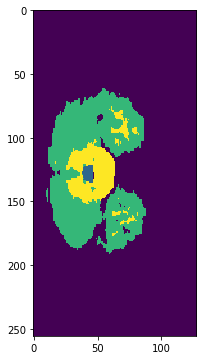

DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


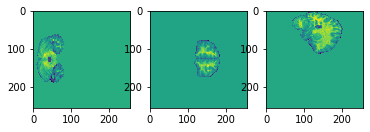

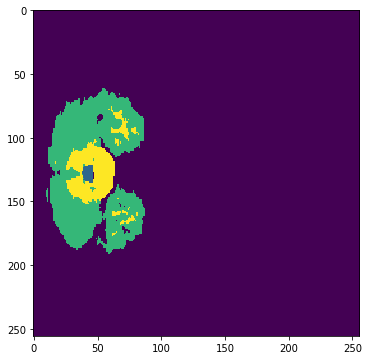

Validation
IBSR_11.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


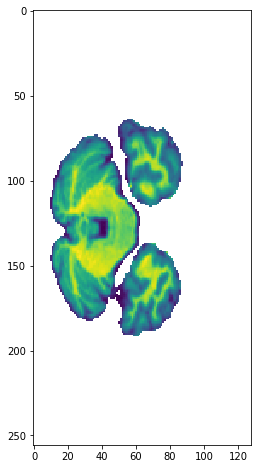

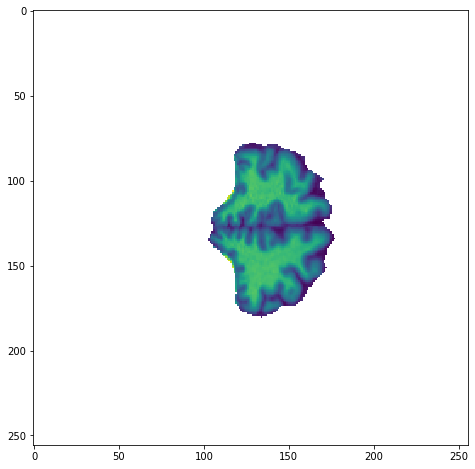

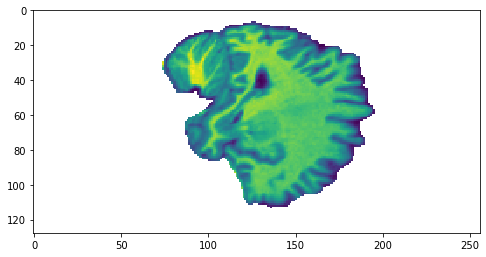

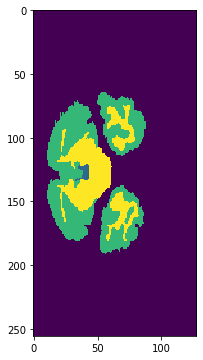

DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


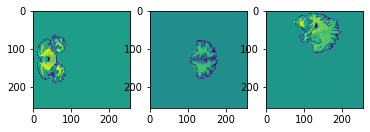

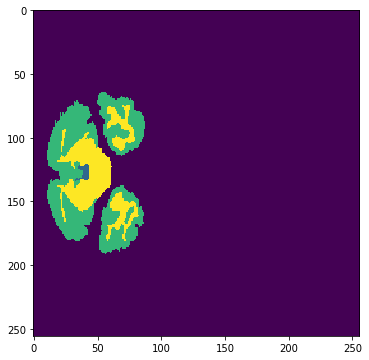

Validation
IBSR_17.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


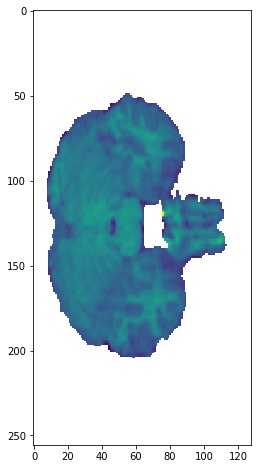

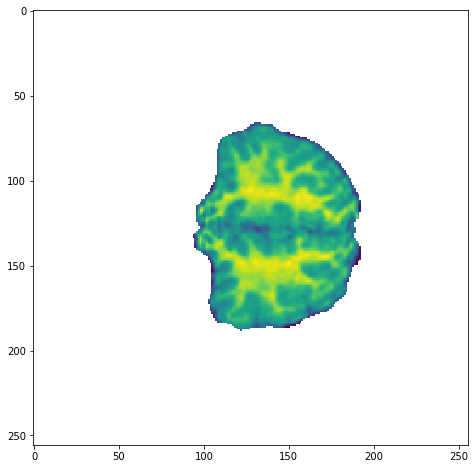

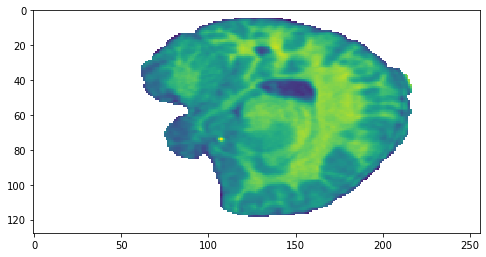

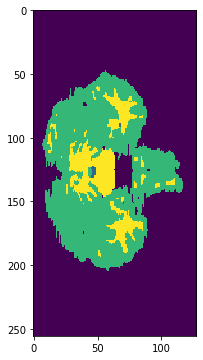

DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


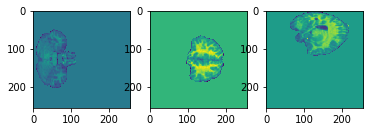

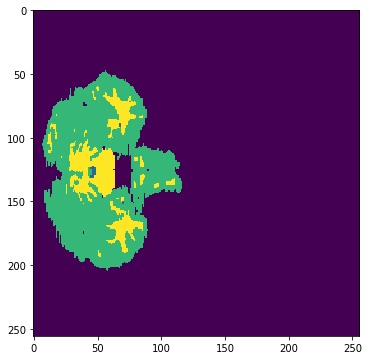

Validation
IBSR_12.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


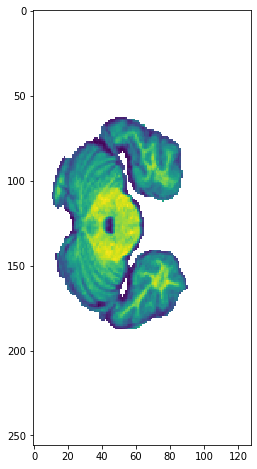

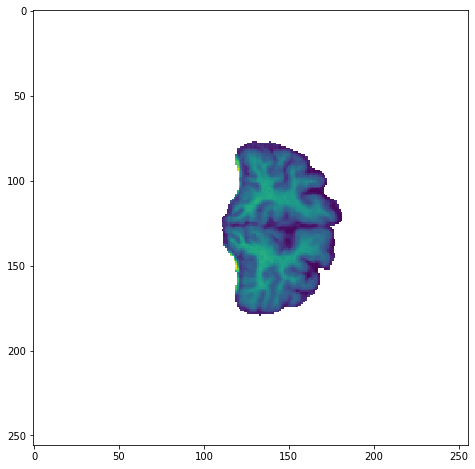

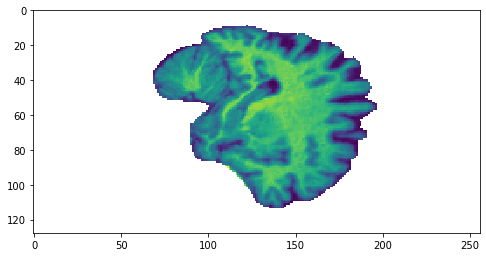

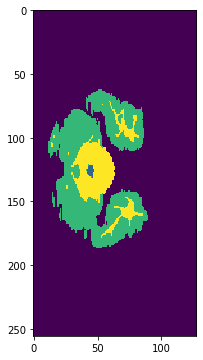

DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


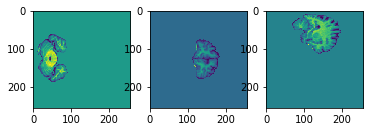

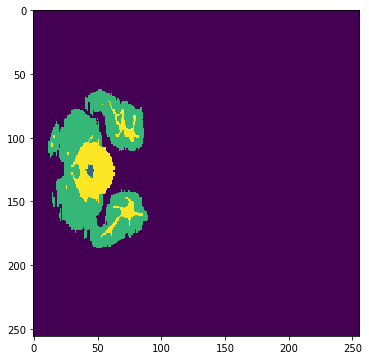

Validation
IBSR_14.nii.gz
DIMENSIONS BEFORE:
(256, 128, 256)
(256, 256, 128)
(128, 256, 256)


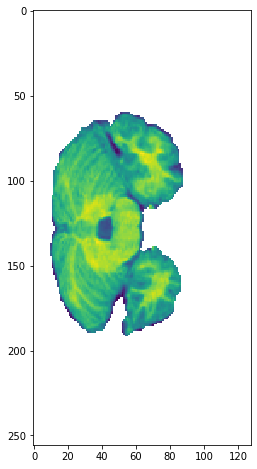

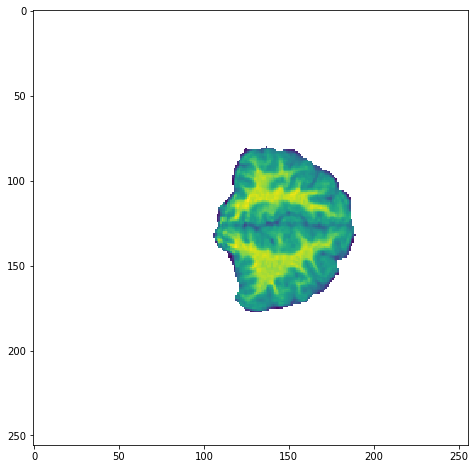

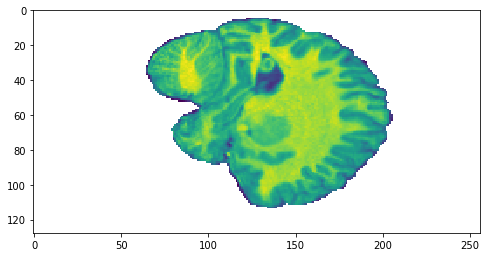

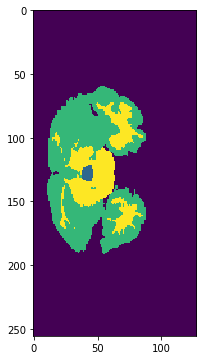

DIMENSIONS AFTER:
(1, 256, 256, 256)
(1, 256, 256, 256)
(1, 256, 256, 256)


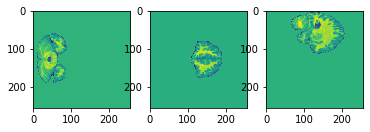

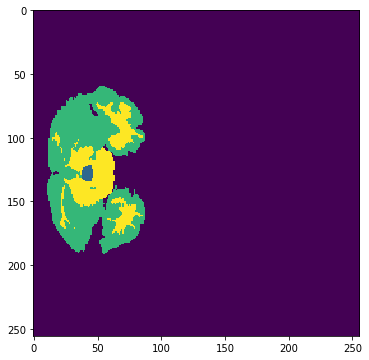

Validation


In [7]:
import matplotlib.pyplot as plt
import numpy.ma as ma

%cd /content
options['verbose'] = True


def normalize_image(im):
  im_mask = (im > 0);
  im_compressed_region = ma.array(im,mask=~im_mask).compressed()
  
  if (im_compressed_region.size == 0):
    return im
  else:
    avg = np.mean(im_compressed_region,dtype='float32')
    std = np.std(im_compressed_region,dtype='float32')
    return (ma.array(im,mask=~im_mask)-avg)/std

# Training - Images 
for scan_id in os.listdir(options['training_path']):
    orig_img = scan_id + ".nii.gz"
    seg_img = scan_id + "_seg.nii.gz"
    if(options['verbose'] == True):
      print(orig_img)

    data = np.squeeze(nib.load(os.path.join(options['training_path'], 
                                        scan_id, 
                                        orig_img)).get_data())

    seg_data = np.squeeze(nib.load(os.path.join(options['training_path'], 
                                        scan_id, 
                                        seg_img)).get_data())


    axial = np.array(normalize_image(np.squeeze(data)))



    coronal = np.swapaxes(axial,1,2)
    saggital = np.swapaxes(axial,0,1)
    saggital = np.swapaxes(saggital,1,2)

    if(options['verbose'] == True):
      print("DIMENSIONS BEFORE:")
      print(axial.shape)
      print(coronal.shape)
      print(saggital.shape)

      plt.figure(figsize=(8, 8))
      plt.imshow(axial[:,:,100])
      plt.figure(figsize=(8, 8))
      plt.imshow(coronal[:,:,100])
      plt.figure(figsize=(8, 8))
      plt.imshow(saggital[:,:,100])

      plt.figure(figsize=(8, 6))
      plt.imshow(seg_data[:,:,100])
      plt.show()



    npad = ((0,256 - axial.shape[0]), (0,256 - axial.shape[1]), (0,256 - axial.shape[2]))
    axial = np.expand_dims(np.pad(axial, pad_width=npad, mode='constant', constant_values=0),0)
    seg_data = np.expand_dims(np.pad(seg_data, pad_width=npad, mode='constant', constant_values=0),0)

    npad = ((0,256 - coronal.shape[0]), (0,256 - coronal.shape[1]), (0,256 - coronal.shape[2]))
    coronal = np.expand_dims(np.pad(coronal, pad_width=npad, mode='constant', constant_values=0),0)

    npad = ((0,256 - saggital.shape[0]), (0,256 - saggital.shape[1]), (0,256 - saggital.shape[2]))
    saggital = np.expand_dims(np.pad(saggital, pad_width=npad, mode='constant', constant_values=0),0)

    data_all = np.concatenate((axial,coronal,saggital),axis=0)
    print(seg_data.shape)
    if(options['verbose'] == True):
      print("DIMENSIONS AFTER:")
      print(axial.shape)
      print(coronal.shape)
      print(saggital.shape)


      plt.figure(figsize=(8, 8))
      plt.subplot(1,4,1)
      plt.imshow(axial[0,:,:,100])
      plt.subplot(1,4,2)
      plt.imshow(coronal[0,:,:,100])
      plt.subplot(1,4,3)
      plt.imshow(saggital[0,:,:,100])

      plt.figure(figsize=(8, 6))
      plt.imshow(seg_data[0,:,:,100])
      plt.show()

    dirname = "/content/new_data/Training_Set/"
    for i in range(data_all.shape[3]):
      if(np.sum(data_all[0,:,:,i]) > 0):
        temp = data_all[:,:,:,i]
        temp_mask = seg_data[:,:,:,i]
        temp_name = scan_id + "_" + str(i) + ".npy"
        np.save(dirname + "/Images/" +temp_name,temp)
        np.save(dirname + "/Masks/" +temp_name,temp_mask)

    


# Validation - Images 

for scan_id in os.listdir(options['val_path']):
    orig_img = scan_id + ".nii.gz"
    seg_img = scan_id + "_seg.nii.gz"
    if(options['verbose'] == True):
      print(orig_img)

    data = np.squeeze(nib.load(os.path.join(options['val_path'], 
                                        scan_id, 
                                        orig_img)).get_data())

    seg_data = np.squeeze(nib.load(os.path.join(options['val_path'], 
                                        scan_id, 
                                        seg_img)).get_data())

    axial = normalize_image(np.squeeze(data))



    coronal = np.swapaxes(axial,1,2)
    saggital = np.swapaxes(axial,0,1)
    saggital = np.swapaxes(saggital,1,2)

    if(options['verbose'] == True):
      print("DIMENSIONS BEFORE:")
      print(axial.shape)
      print(coronal.shape)
      print(saggital.shape)

      plt.figure(figsize=(8, 8))
      plt.imshow(axial[:,:,100])
      plt.figure(figsize=(8, 8))
      plt.imshow(coronal[:,:,100])
      plt.figure(figsize=(8, 8))
      plt.imshow(saggital[:,:,100])

      plt.figure(figsize=(8, 6))
      plt.imshow(seg_data[:,:,100])
      plt.show()

    npad = ((0,256 - axial.shape[0]), (0,256 - axial.shape[1]), (0,256 - axial.shape[2]))
    axial = np.expand_dims(np.pad(axial, pad_width=npad, mode='constant', constant_values=0),0)
    seg_data = np.expand_dims(np.pad(seg_data, pad_width=npad, mode='constant', constant_values=0),0)

    npad = ((0,256 - coronal.shape[0]), (0,256 - coronal.shape[1]), (0,256 - coronal.shape[2]))
    coronal = np.expand_dims(np.pad(coronal, pad_width=npad, mode='constant', constant_values=0),0)

    npad = ((0,256 - saggital.shape[0]), (0,256 - saggital.shape[1]), (0,256 - saggital.shape[2]))
    saggital = np.expand_dims(np.pad(saggital, pad_width=npad, mode='constant', constant_values=0),0)

    data_all = np.concatenate((axial,coronal,saggital),axis=0)
    if(options['verbose'] == True):
      print("DIMENSIONS AFTER:")
      print(axial.shape)
      print(coronal.shape)
      print(saggital.shape)


      plt.figure(figsize=(8, 8))
      plt.subplot(1,4,1)
      plt.imshow(axial[0,:,:,100])
      plt.subplot(1,4,2)
      plt.imshow(coronal[0,:,:,100])
      plt.subplot(1,4,3)
      plt.imshow(saggital[0,:,:,100])

      plt.figure(figsize=(8, 6))
      plt.imshow(seg_data[0,:,:,100])
      plt.show()
      print("Validation")

    dirname = "/content/new_data/Validation_Set/"
    for i in range(data_all.shape[3]):
      if(np.sum(data_all[0,:,:,i]) > 0):
        temp = data_all[:,:,:,i]
        temp_mask = seg_data[:,:,:,i]
        temp_name = scan_id + "_" + str(i) + ".npy"
        np.save(dirname + "/Images/" +temp_name,temp)
        np.save(dirname + "/Masks/" +temp_name,temp_mask)

    np.save(dirname + "orig/" +scan_id + ".npy",data_all)
    np.save(dirname + "orig/" +scan_id + "_seg.npy",seg_data)


    


## Testing the Input

(1, 256, 256)


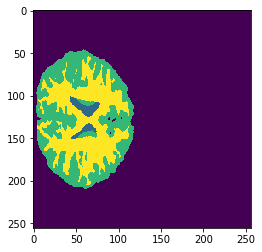

34772
(1, 256, 256)


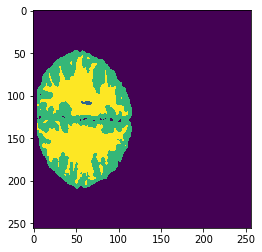

34582
(1, 256, 256)


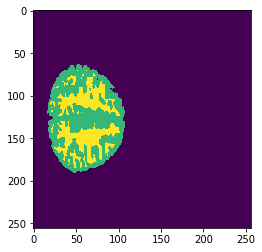

20698
(1, 256, 256)


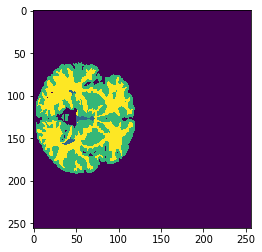

27924
(1, 256, 256)


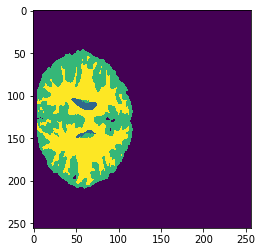

34644
(1, 256, 256)


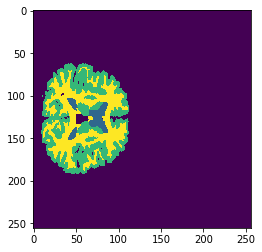

24170
(1, 256, 256)


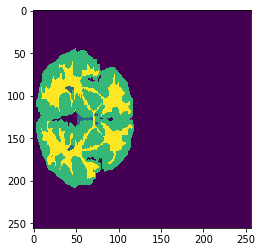

31826
(1, 256, 256)


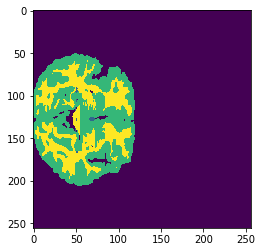

33939
(1, 256, 256)


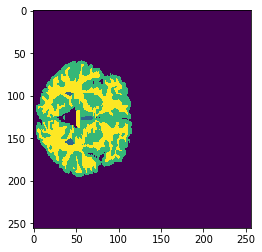

27453
(1, 256, 256)


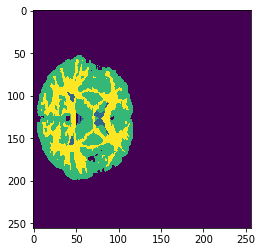

29354
(1, 256, 256)


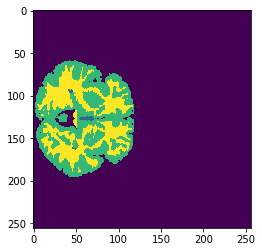

28665
(1, 256, 256)


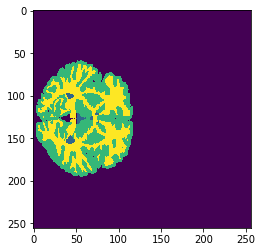

28451
(1, 256, 256)


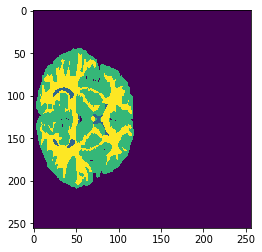

33423
(1, 256, 256)


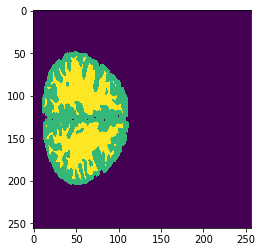

30182
(1, 256, 256)


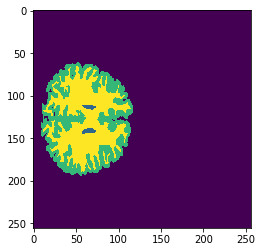

27190
(1, 256, 256)


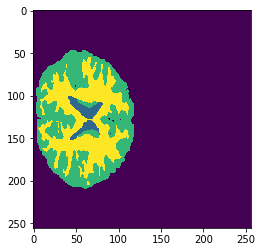

34601
(1, 256, 256)


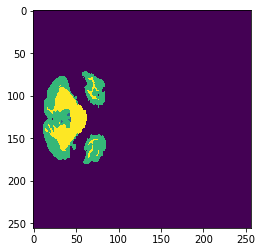

11291
(1, 256, 256)


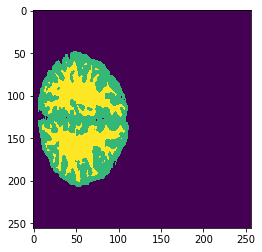

30911
(1, 256, 256)


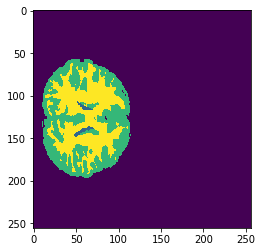

28083
(1, 256, 256)


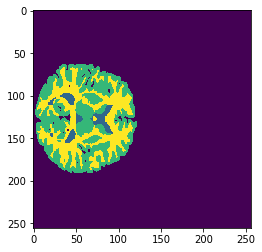

27764
(1, 256, 256)


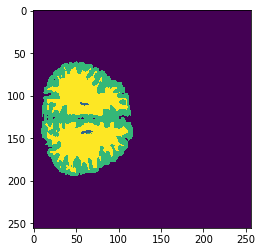

28103
(1, 256, 256)


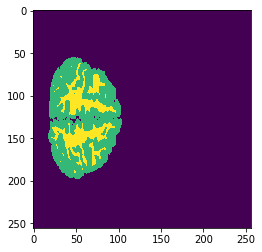

21190
(1, 256, 256)


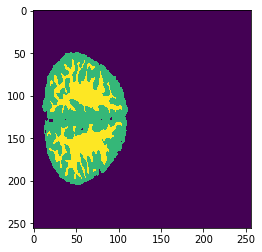

27765
(1, 256, 256)


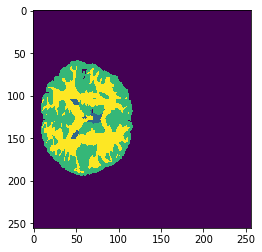

27184
(1, 256, 256)


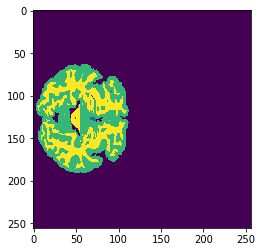

24964
(1, 256, 256)


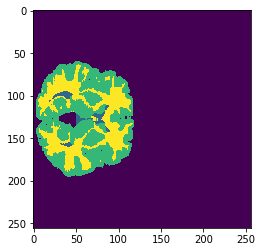

28332
(1, 256, 256)


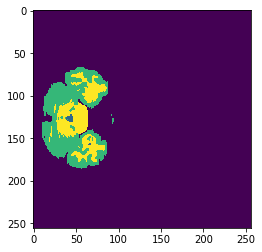

15188
(1, 256, 256)


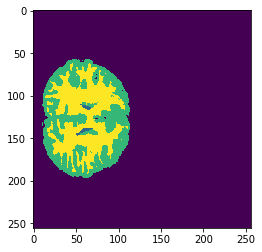

28118
(1, 256, 256)


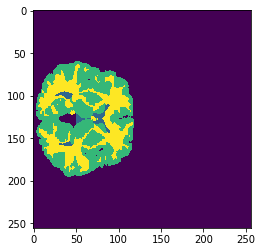

28308
(1, 256, 256)


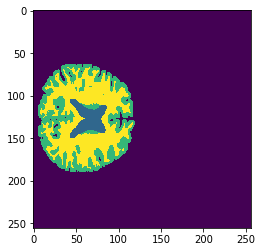

27546
(1, 256, 256)


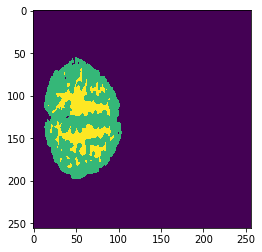

21853
(1, 256, 256)


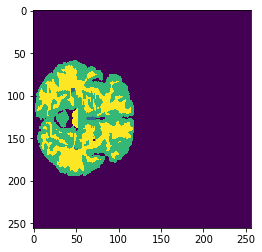

28423
(1, 256, 256)


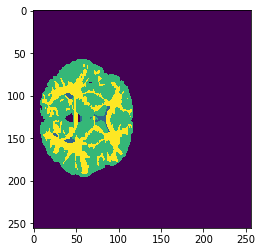

26870
(1, 256, 256)


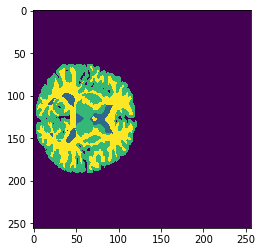

27618
(1, 256, 256)


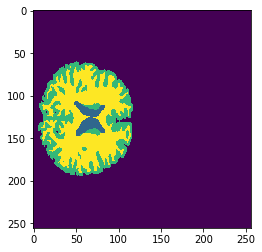

28774
(1, 256, 256)


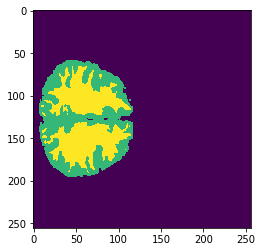

29777
(1, 256, 256)


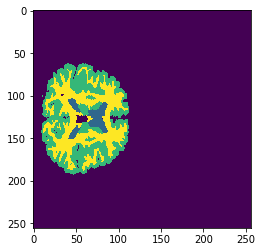

24282
(1, 256, 256)


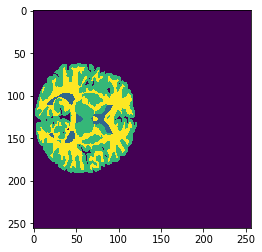

27721
(1, 256, 256)


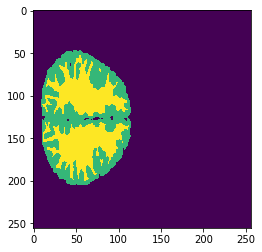

32461
(1, 256, 256)


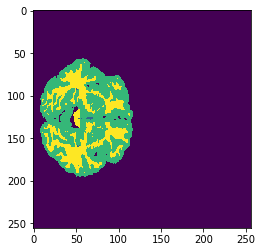

26016
(1, 256, 256)


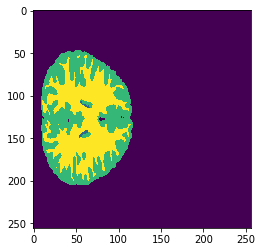

33380
(1, 256, 256)


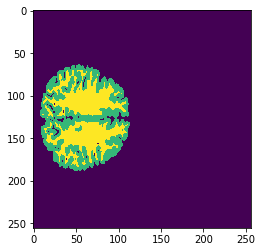

24284
(1, 256, 256)


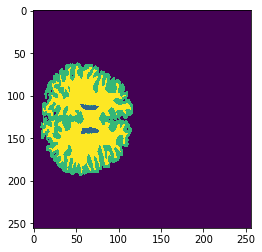

27478
(1, 256, 256)


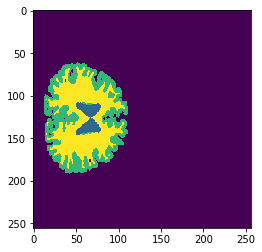

23599
(1, 256, 256)


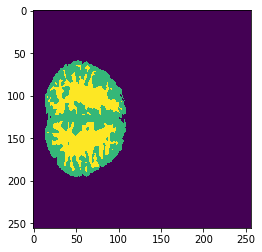

24634
(1, 256, 256)


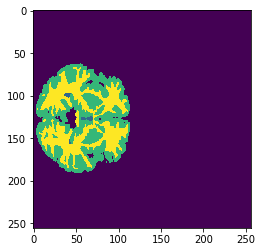

25786
(1, 256, 256)


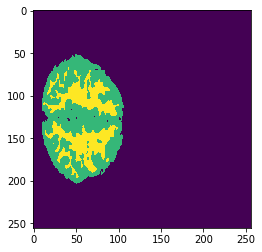

25719
(1, 256, 256)


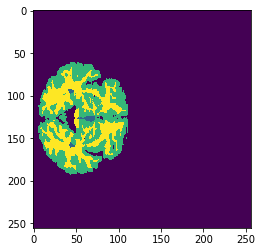

24201
(1, 256, 256)


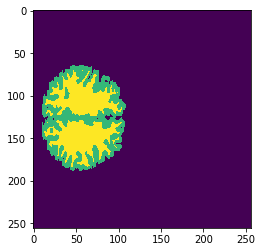

23493
(1, 256, 256)


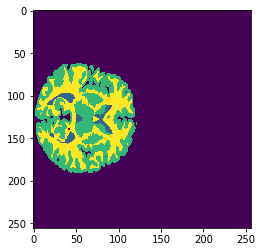

27609
(1, 256, 256)


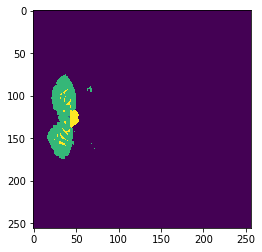

4948
(1, 256, 256)


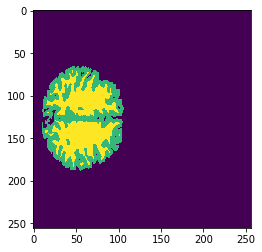

21997
(1, 256, 256)


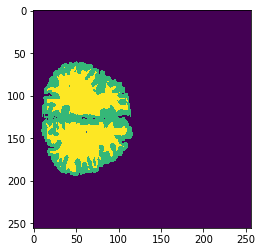

27833
(1, 256, 256)


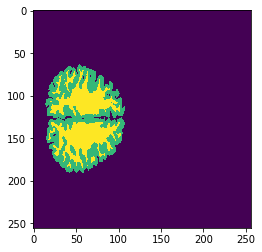

21393
(1, 256, 256)


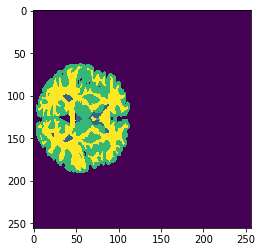

26188
(1, 256, 256)


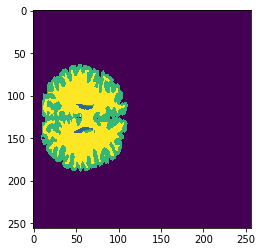

25276
(1, 256, 256)


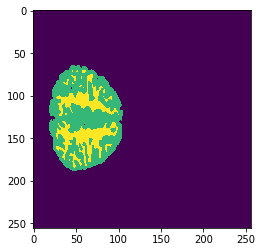

19118
(1, 256, 256)


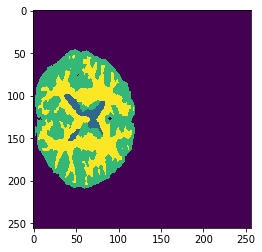

34810
(1, 256, 256)


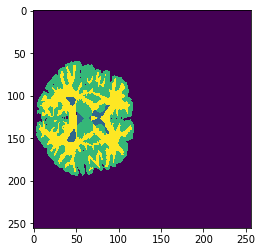

27864
(1, 256, 256)


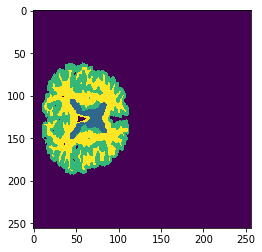

24268
(1, 256, 256)


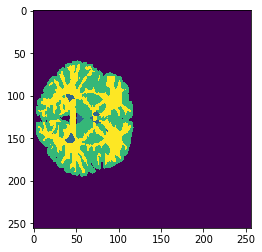

28386
(1, 256, 256)


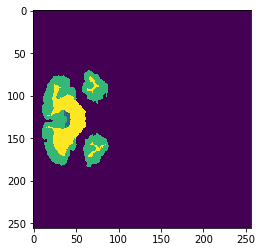

12470
(1, 256, 256)


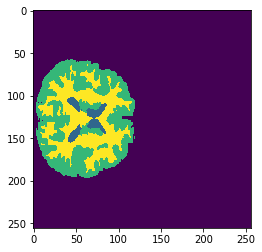

30298
(1, 256, 256)


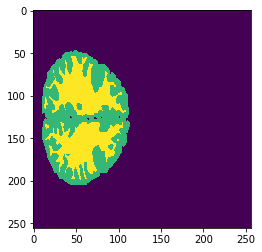

31000
(1, 256, 256)


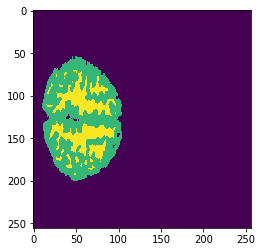

23449
(1, 256, 256)


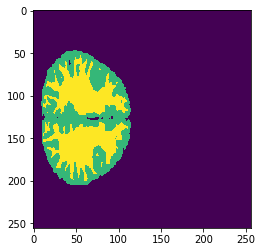

32311
(1, 256, 256)


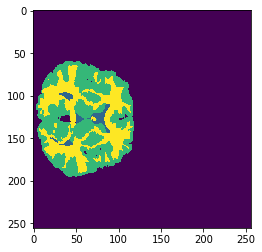

28625
(1, 256, 256)


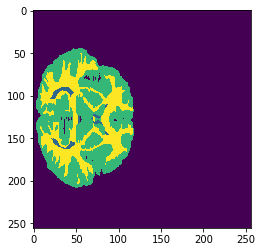

33169
(1, 256, 256)


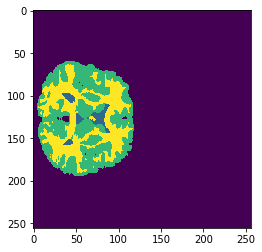

28788
(1, 256, 256)


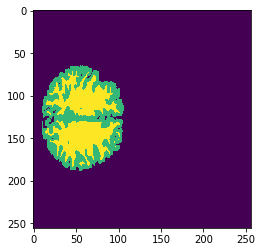

22525
(1, 256, 256)


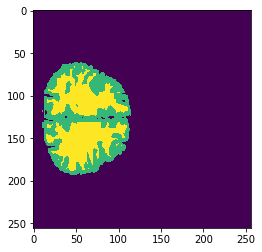

26672
(1, 256, 256)


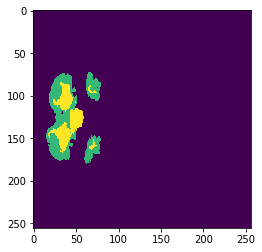

8633
(1, 256, 256)


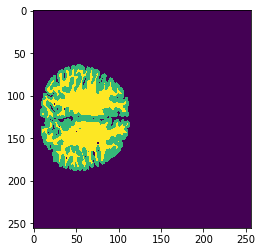

24758
(1, 256, 256)


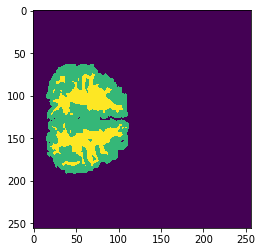

23669
(1, 256, 256)


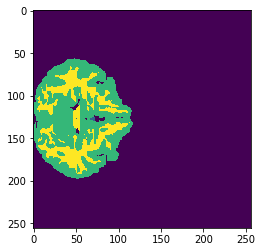

27287
(1, 256, 256)


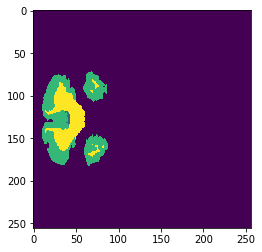

11693
(1, 256, 256)


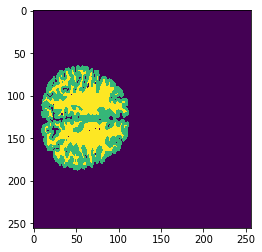

23325
(1, 256, 256)


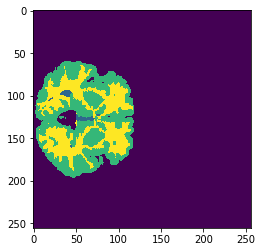

28518
(1, 256, 256)


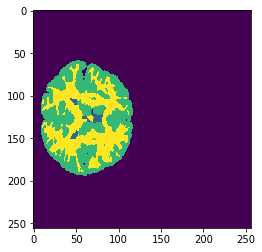

27269
(1, 256, 256)


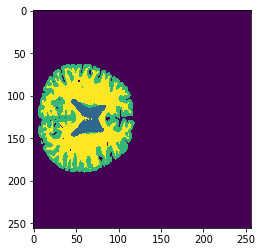

27520
(1, 256, 256)


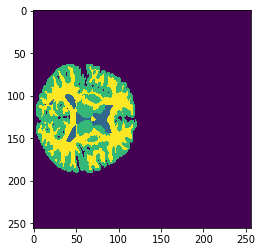

27393
(1, 256, 256)


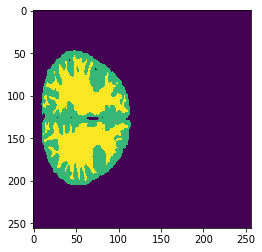

32122
(1, 256, 256)


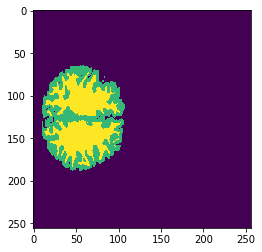

22923
(1, 256, 256)


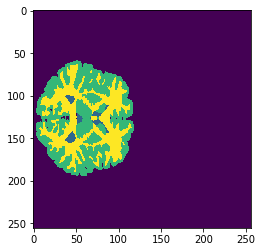

28095
(1, 256, 256)


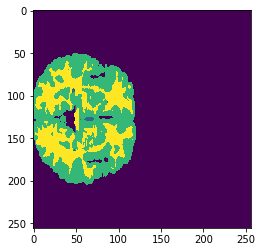

34594
(1, 256, 256)


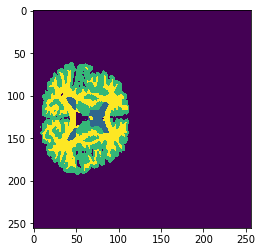

24100
(1, 256, 256)


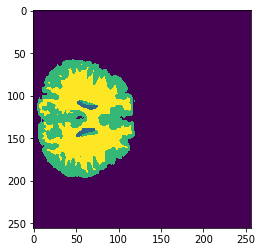

30784
(1, 256, 256)


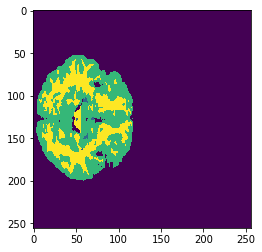

29262
(1, 256, 256)


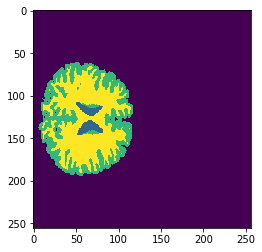

28393
(1, 256, 256)


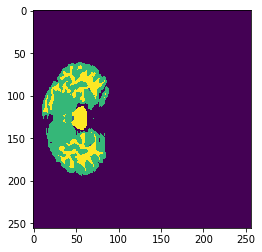

16181
(1, 256, 256)


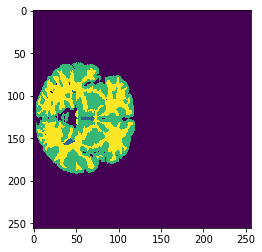

27901
(1, 256, 256)


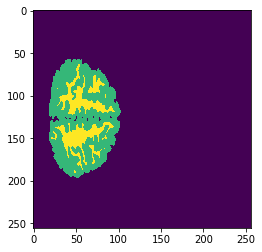

20038
(1, 256, 256)


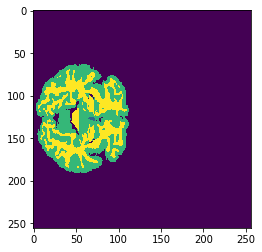

25140
(1, 256, 256)


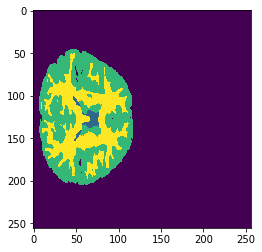

32564
(1, 256, 256)


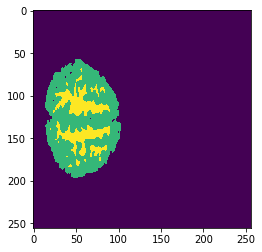

20619
(1, 256, 256)


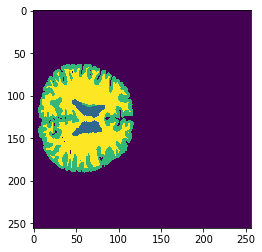

27747
(1, 256, 256)


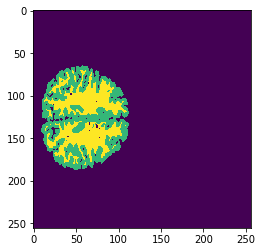

22723
(1, 256, 256)


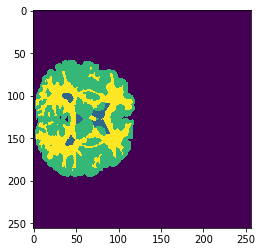

30417
(1, 256, 256)


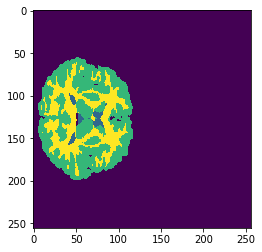

28463
(1, 256, 256)


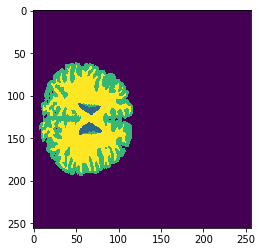

28195
(1, 256, 256)


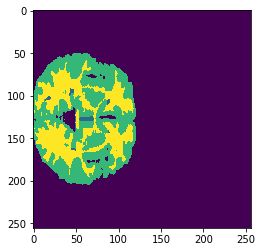

34804
(1, 256, 256)


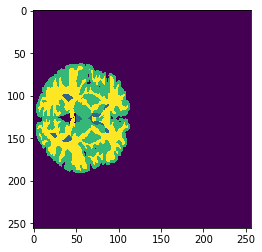

26273
(1, 256, 256)


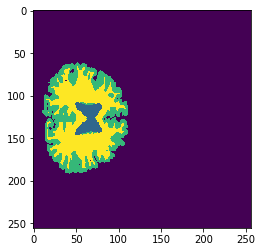

23710
(1, 256, 256)


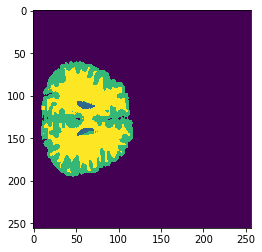

28719
(1, 256, 256)


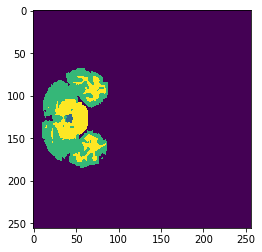

14891
(1, 256, 256)


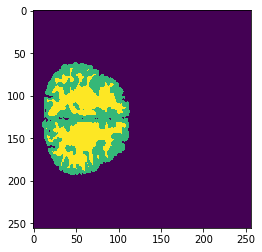

25563
(1, 256, 256)


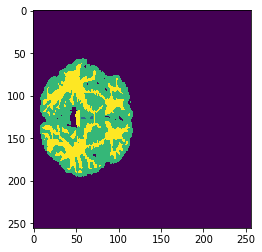

26543
(1, 256, 256)


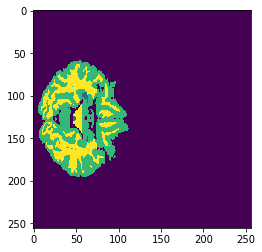

22279
(1, 256, 256)


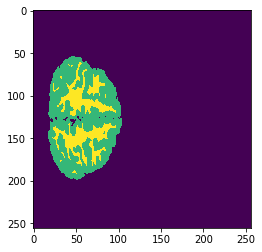

21632
(1, 256, 256)


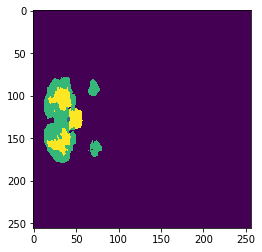

8387
(1, 256, 256)


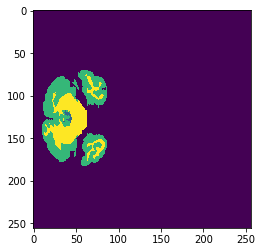

12997
(1, 256, 256)


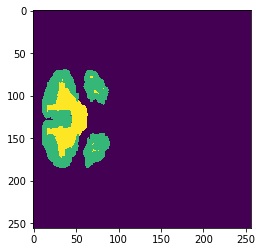

14109
(1, 256, 256)


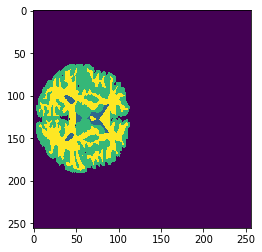

25961
(1, 256, 256)


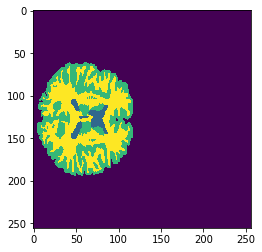

28524
(1, 256, 256)


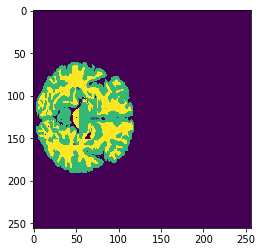

27160
(1, 256, 256)


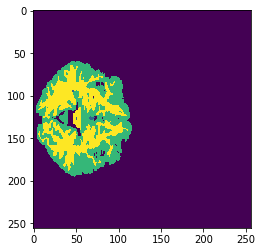

26307
(1, 256, 256)


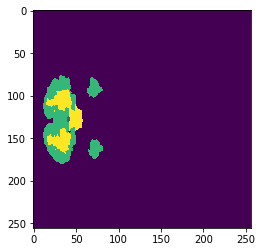

8984
(1, 256, 256)


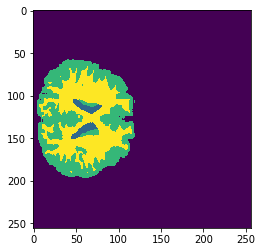

30484
(1, 256, 256)


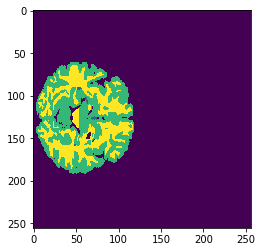

26767
(1, 256, 256)


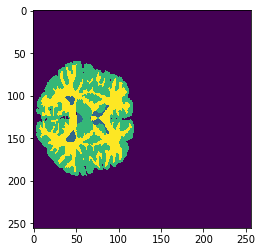

28043
(1, 256, 256)


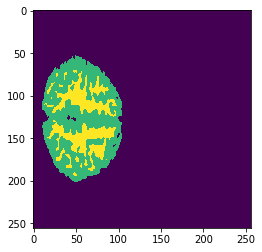

24055
(1, 256, 256)


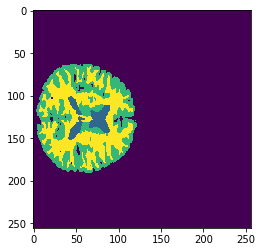

27702
(1, 256, 256)


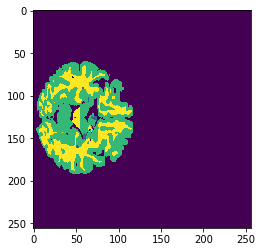

24569
(1, 256, 256)


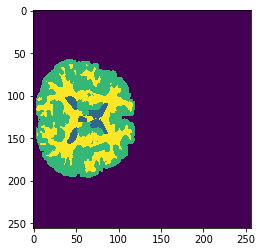

30133
(1, 256, 256)


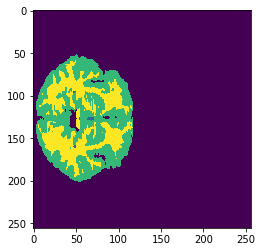

30169
(1, 256, 256)


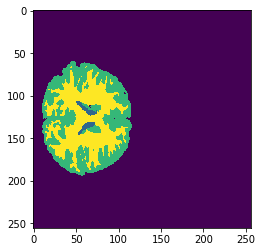

26779
(1, 256, 256)


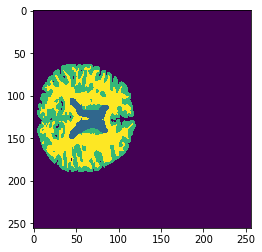

27493
(1, 256, 256)


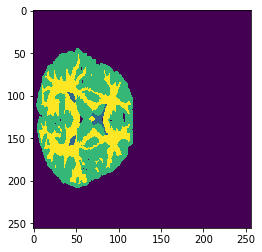

33206
(1, 256, 256)


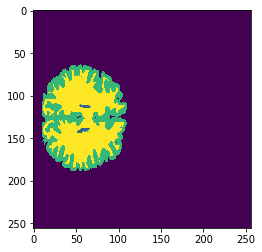

25061
(1, 256, 256)


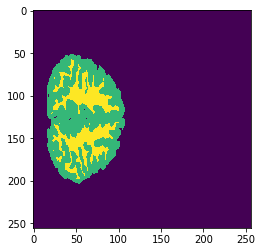

24524
(1, 256, 256)


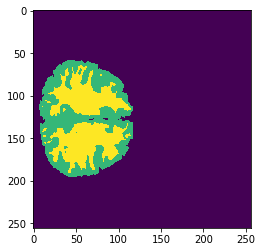

29416
(1, 256, 256)


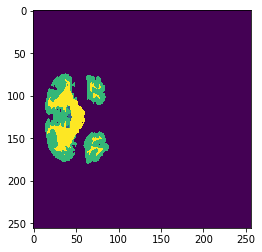

11084
(1, 256, 256)


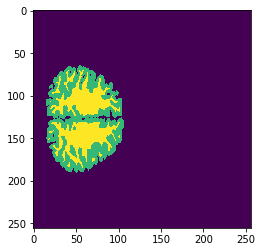

20864
(1, 256, 256)


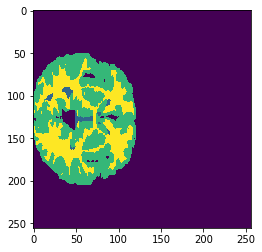

34395
(1, 256, 256)


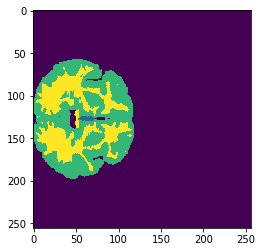

30376
(1, 256, 256)


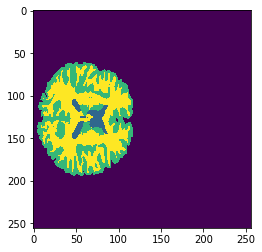

28622
(1, 256, 256)


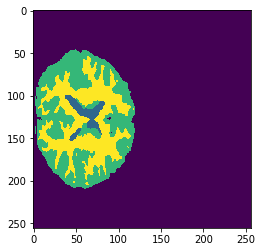

34686
(1, 256, 256)


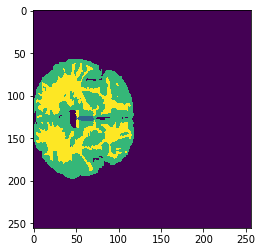

30581
(1, 256, 256)


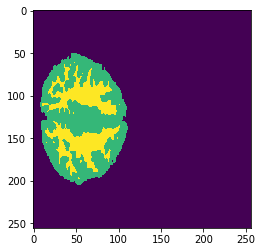

27697
(1, 256, 256)


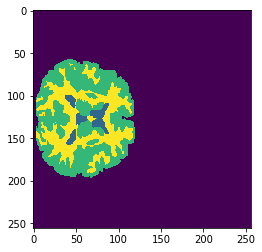

30128
(1, 256, 256)


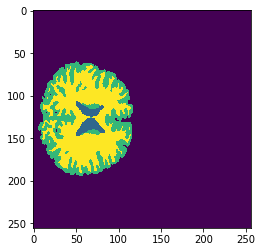

28654
(1, 256, 256)


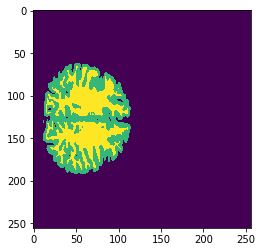

25041
(1, 256, 256)


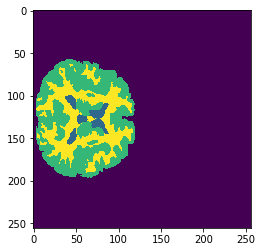

30082
(1, 256, 256)


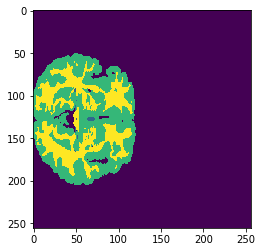

34281
(1, 256, 256)


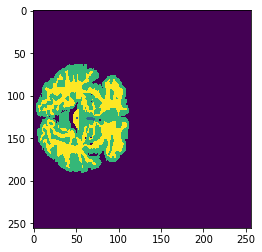

25427
(1, 256, 256)


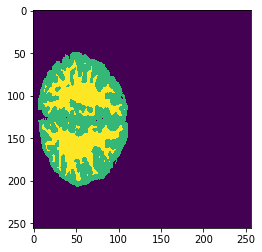

30252
(1, 256, 256)


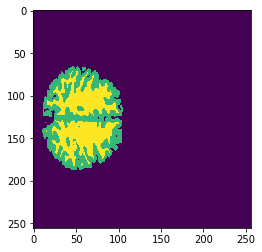

21395
(1, 256, 256)


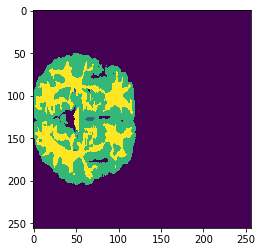

34392
(1, 256, 256)


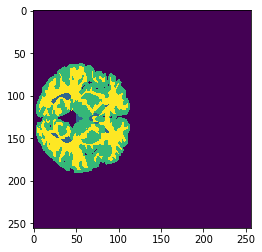

26026
(1, 256, 256)


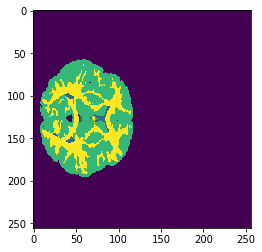

26880
(1, 256, 256)


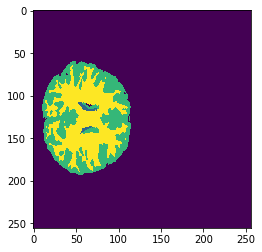

26810
(1, 256, 256)


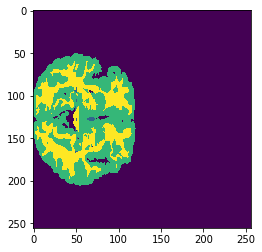

34041
(1, 256, 256)


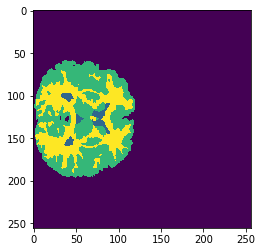

30543
(1, 256, 256)


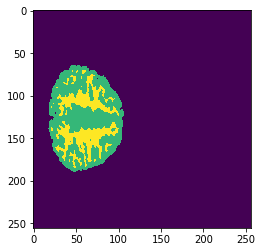

19639
(1, 256, 256)


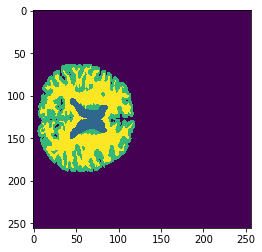

27525
(1, 256, 256)


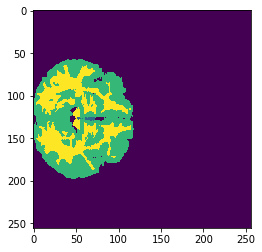

29964
(1, 256, 256)


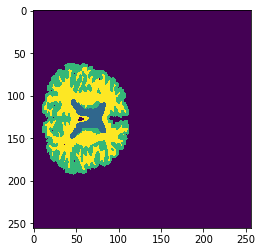

24297
(1, 256, 256)


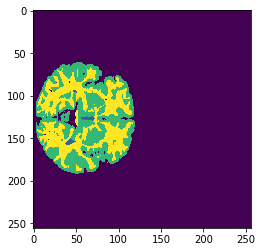

27829
(1, 256, 256)


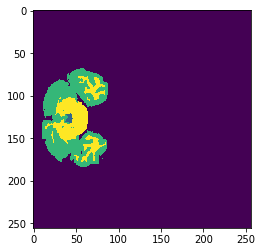

14606
(1, 256, 256)


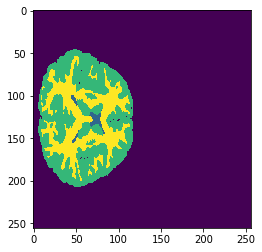

32915
(1, 256, 256)


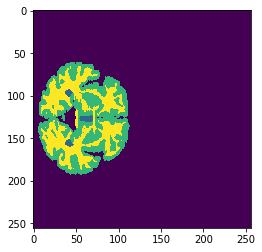

24882
(1, 256, 256)


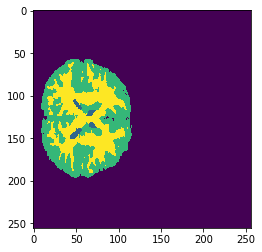

28199
(1, 256, 256)


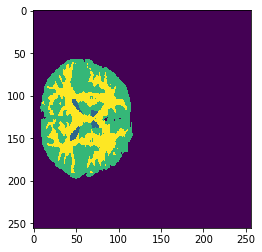

28124
(1, 256, 256)


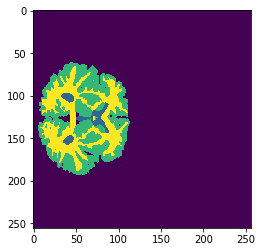

24644
(1, 256, 256)


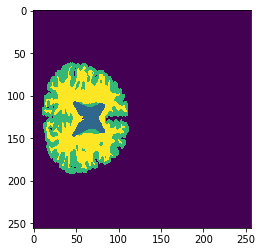

24433
(1, 256, 256)


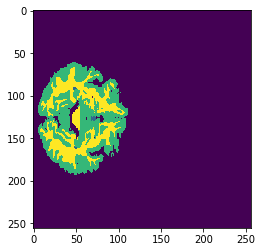

22554
(1, 256, 256)


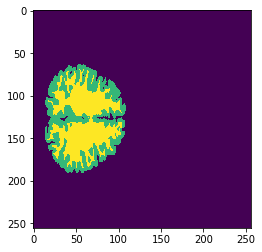

22678
(1, 256, 256)


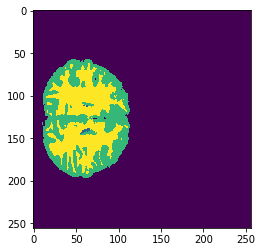

28125
(1, 256, 256)


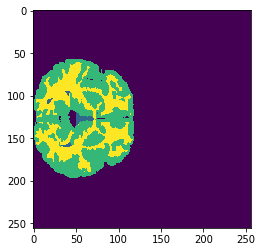

30873
(1, 256, 256)


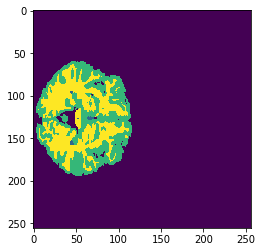

27188
(1, 256, 256)


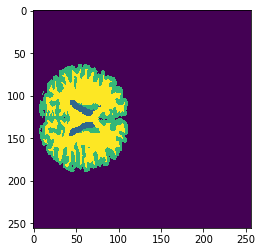

25581
(1, 256, 256)


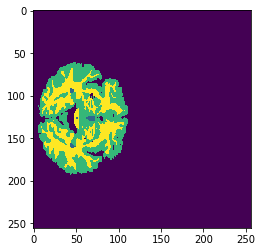

23794
(1, 256, 256)


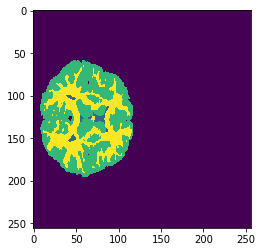

26998
(1, 256, 256)


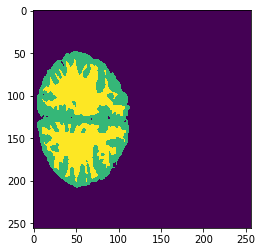

32820
(1, 256, 256)


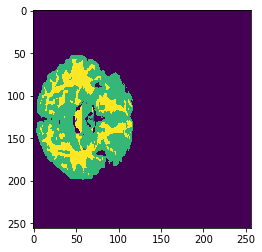

28151
(1, 256, 256)


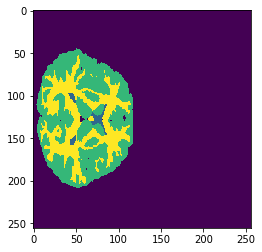

33151
(1, 256, 256)


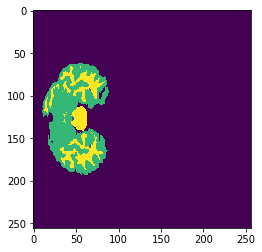

15730
(1, 256, 256)


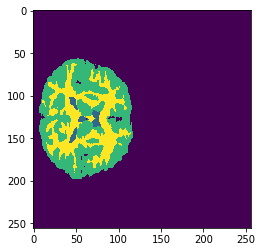

27971
(1, 256, 256)


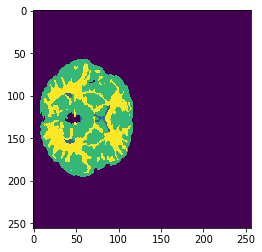

26919
(1, 256, 256)


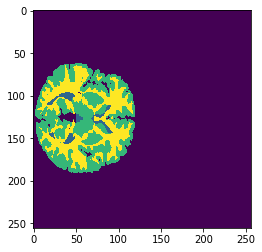

27312
(1, 256, 256)


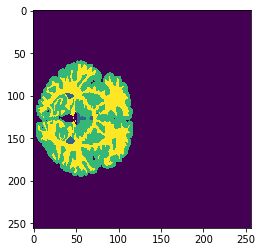

28211
(1, 256, 256)


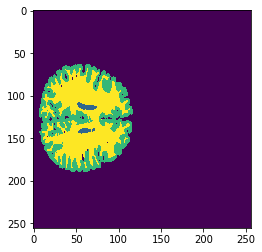

27291
(1, 256, 256)


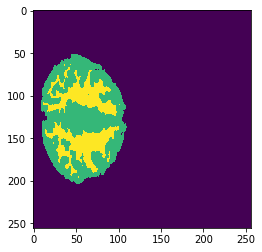

26760
(1, 256, 256)


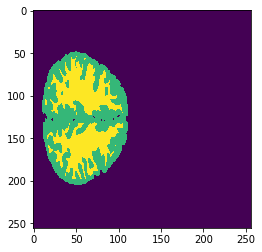

29634
(1, 256, 256)


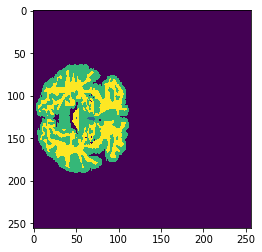

25267
(1, 256, 256)


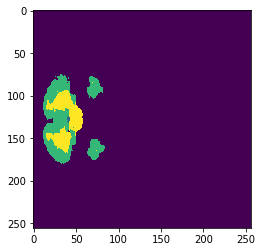

9389
(1, 256, 256)


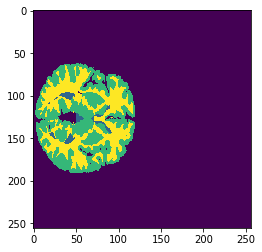

27375
(1, 256, 256)


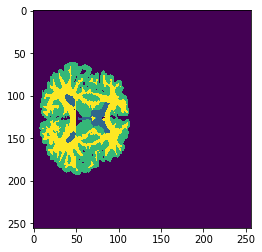

24337
(1, 256, 256)


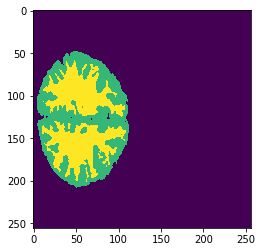

32251
(1, 256, 256)


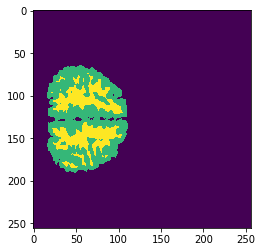

21847
(1, 256, 256)


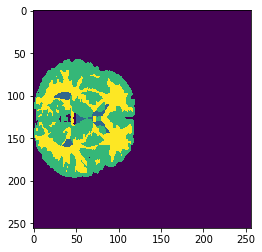

30543
(1, 256, 256)


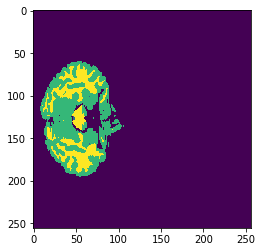

18640
(1, 256, 256)


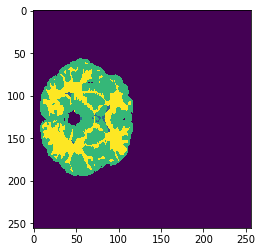

27060
(1, 256, 256)


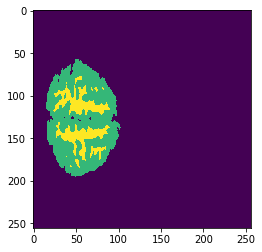

19363
(1, 256, 256)


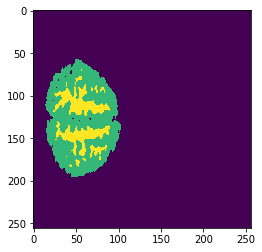

20050
(1, 256, 256)


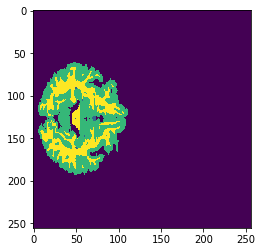

22045
(1, 256, 256)


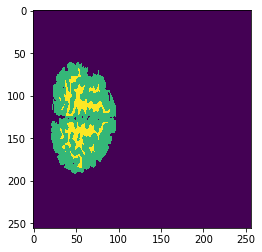

16580
(1, 256, 256)


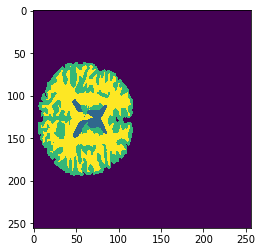

28654
(1, 256, 256)


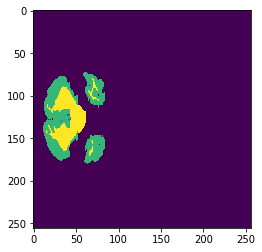

10820
(1, 256, 256)


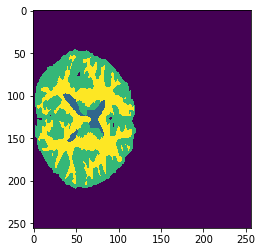

34964
(1, 256, 256)


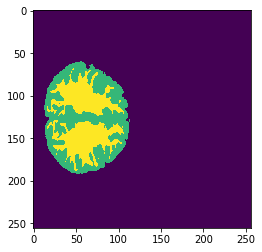

24915
(1, 256, 256)


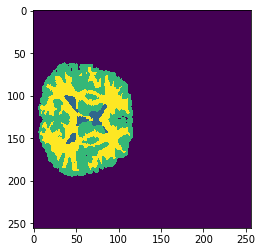

28710
(1, 256, 256)


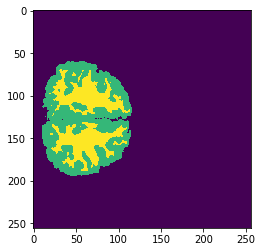

26673
(1, 256, 256)


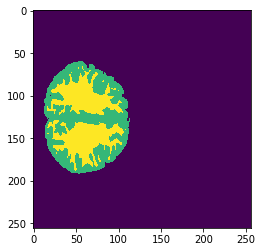

25197
(1, 256, 256)


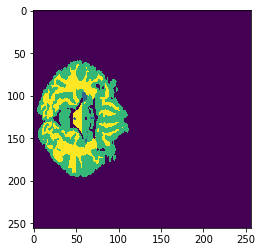

22873
(1, 256, 256)


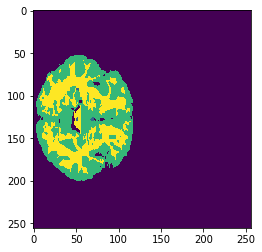

30143
(1, 256, 256)


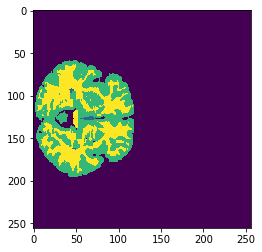

28747
(1, 256, 256)


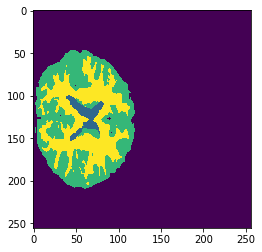

34532
(1, 256, 256)


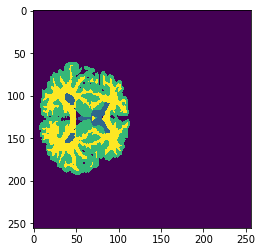

24377
(1, 256, 256)


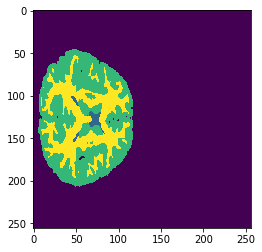

32762
(1, 256, 256)


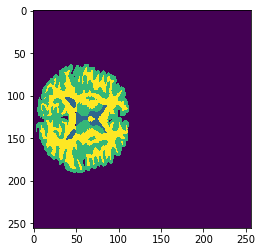

25586
(1, 256, 256)


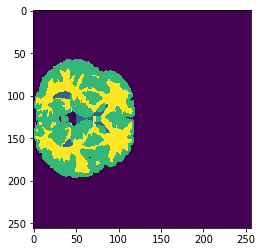

30625
(1, 256, 256)


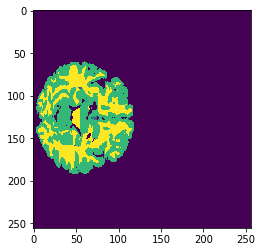

26213
(1, 256, 256)


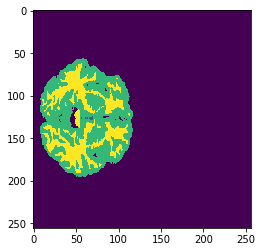

26267
(1, 256, 256)


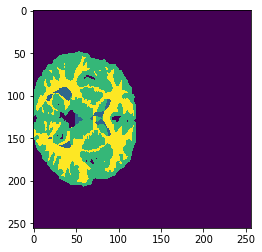

34656
(1, 256, 256)


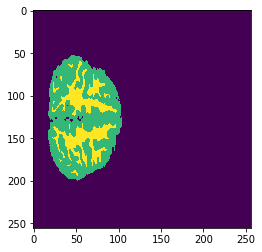

22111
(1, 256, 256)


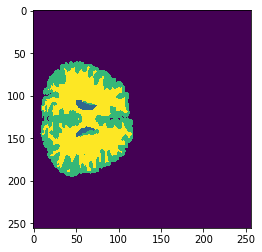

28927
(1, 256, 256)


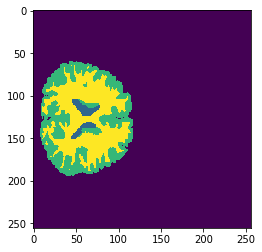

28802
(1, 256, 256)


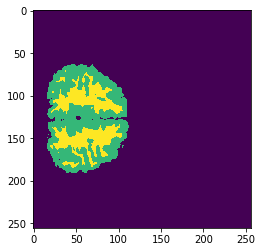

22670
(1, 256, 256)


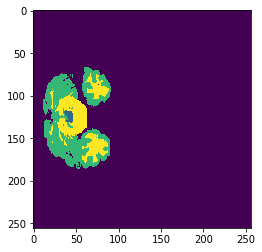

14866
(1, 256, 256)


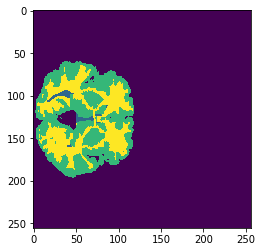

28514
(1, 256, 256)


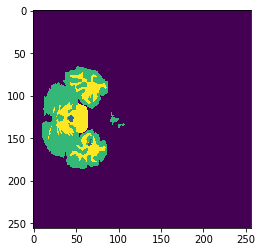

15121
(1, 256, 256)


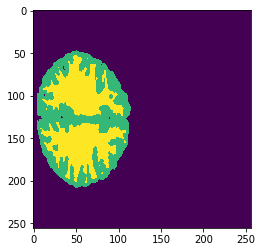

33588
(1, 256, 256)


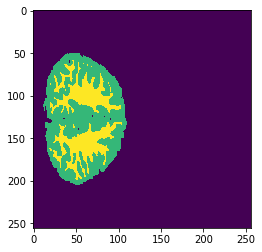

26529
(1, 256, 256)


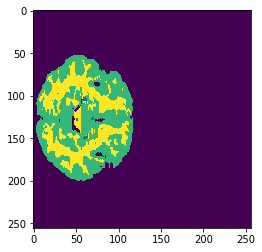

29690
(1, 256, 256)


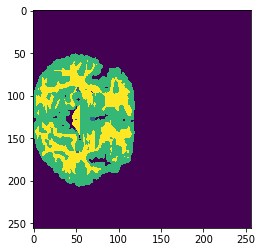

33700
(1, 256, 256)


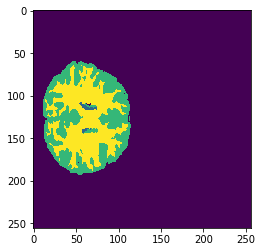

26712
(1, 256, 256)


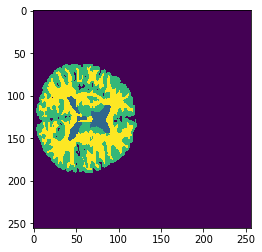

27695
(1, 256, 256)


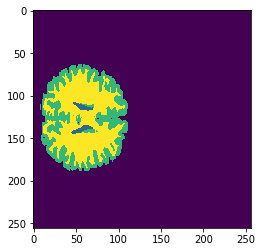

25543
(1, 256, 256)


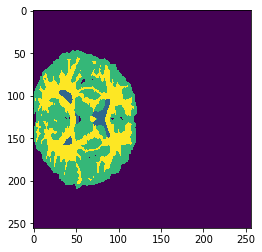

35541
(1, 256, 256)


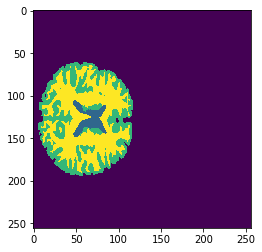

28647
(1, 256, 256)


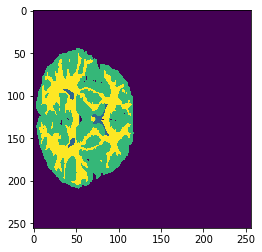

33432
(1, 256, 256)


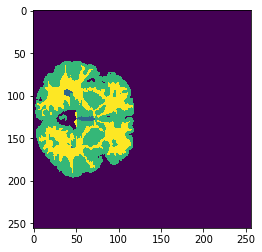

28565
(1, 256, 256)


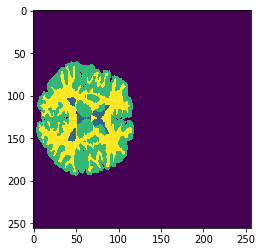

27944
(1, 256, 256)


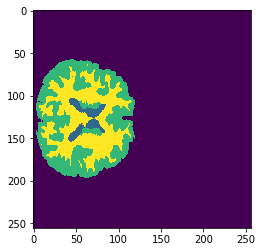

30399
(1, 256, 256)


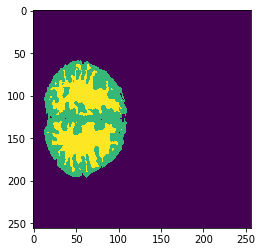

25126
(1, 256, 256)


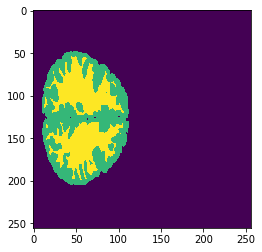

30672
(1, 256, 256)


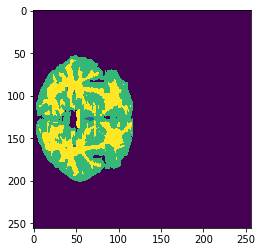

29917
(1, 256, 256)


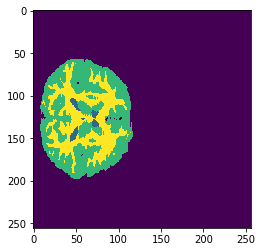

28039
(1, 256, 256)


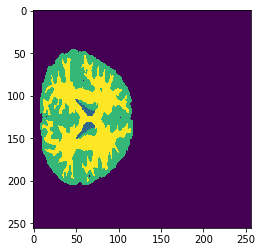

33163
(1, 256, 256)


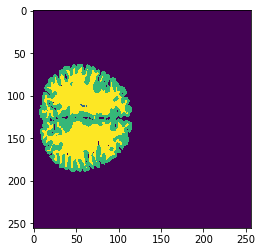

26705
(1, 256, 256)


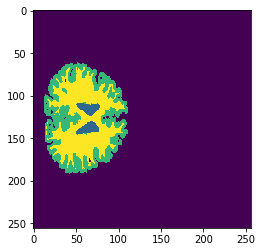

23636
(1, 256, 256)


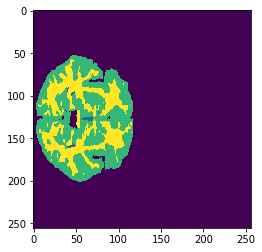

29647
(1, 256, 256)


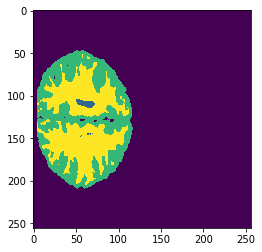

34669
(1, 256, 256)


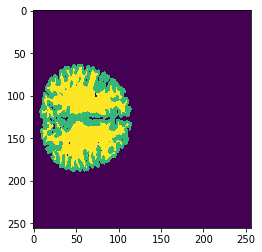

26220
(1, 256, 256)


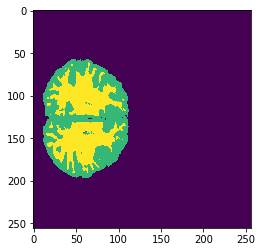

27487
(1, 256, 256)


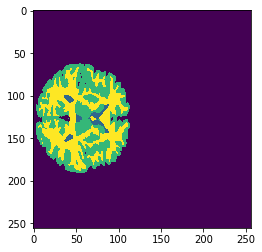

26111
(1, 256, 256)


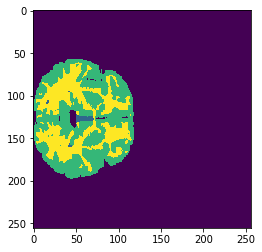

30880
(1, 256, 256)


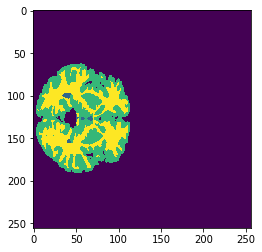

25807
(1, 256, 256)


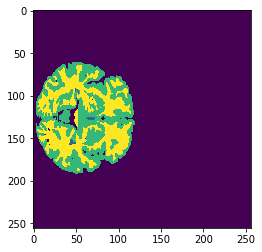

27884
(1, 256, 256)


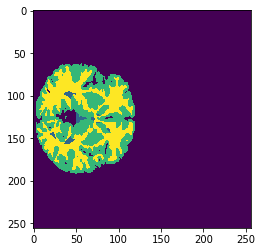

27606


In [5]:
test = os.listdir("/content/new_data/Training_Set/Masks")
k = 0
for i in test:
  if i.endswith(".npy") == True:
    temp= np.load("/content/new_data/Training_Set/Masks" + "/" + i)
    print(temp.shape)
    plt.figure()
    plt.imshow(temp[0,:,:])
    plt.show()
    print(np.sum(temp))
    k = k+1
    if (k > 250):
      break

## Data Generator

In [0]:
from torch.utils.data import Dataset, DataLoader
import glob
import os
import numpy as np
import cv2
import torch
from torchvision import transforms, utils

class SegDataset(Dataset):
    """Segmentation Dataset"""
 
    def __init__(self, root_dir, imageFolder, maskFolder, transform=None, seed=None, fraction=None, subset=None, imagecolormode='rgb', maskcolormode='grayscale'):
        """
        Args:
            root_dir (string): Directory with all the images and should have the following structure.
            root
            --Images
            -----Img 1
            -----Img N
            --Mask
            -----Mask 1
            -----Mask N
            imageFolder (string) = 'Images' : Name of the folder which contains the Images.
            maskFolder (string)  = 'Masks : Name of the folder which contains the Masks.
            transform (callable, optional): Optional transform to be applied on a sample.
            seed: Specify a seed for the train and test split
            fraction: A float value from 0 to 1 which specifies the validation split fraction
            subset: 'Train' or 'Test' to select the appropriate set.
            imagecolormode: 'rgb' or 'grayscale'
            maskcolormode: 'rgb' or 'grayscale'
        """
        self.color_dict = {'rgb': 1, 'grayscale': 0}
        assert(imagecolormode in ['rgb', 'grayscale'])
        assert(maskcolormode in ['rgb', 'grayscale'])
 
        self.imagecolorflag = self.color_dict[imagecolormode]
        self.maskcolorflag = self.color_dict[maskcolormode]
        self.root_dir = root_dir
        self.transform = transform
        if not fraction:
            self.image_names = sorted(
                glob.glob(os.path.join(self.root_dir, imageFolder, '*')))
            self.mask_names = sorted(
                glob.glob(os.path.join(self.root_dir, maskFolder, '*')))
        else:
            assert(subset in ['Train', 'Test'])
            self.fraction = fraction
            self.image_list = np.array(
                sorted(glob.glob(os.path.join(self.root_dir, imageFolder, '*'))))
            self.mask_list = np.array(
                sorted(glob.glob(os.path.join(self.root_dir, maskFolder, '*'))))
            if seed:
                np.random.seed(seed)
            indices = np.arange(len(self.image_list))
            np.random.shuffle(indices)
            self.image_list = self.image_list[indices]
            self.mask_list = self.mask_list[indices]
            if subset == 'Train':
                self.image_names = self.image_list[:int(
                    np.ceil(len(self.image_list)*(1-self.fraction)))]
                self.mask_names = self.mask_list[:int(
                    np.ceil(len(self.mask_list)*(1-self.fraction)))]
            else:
                self.image_names = self.image_list[int(
                    np.ceil(len(self.image_list)*(1-self.fraction))):]
                self.mask_names = self.mask_list[int(
                    np.ceil(len(self.mask_list)*(1-self.fraction))):]
 
    def __len__(self):
        return len(self.image_names)
 
    def __getitem__(self, idx):
        img_name = self.image_names[idx]
        if self.imagecolorflag:
            image = np.load(img_name)
        else:
            image = np.load(img_name)
        msk_name = self.mask_names[idx]
        if self.maskcolorflag:
            mask = np.load(msk_name)
        else:
            mask = np.load(msk_name)
        sample = {'image': image, 'mask': mask}
 
        if self.transform:
            sample = self.transform(sample)
 
        return sample

## Data Generator Class Helper Functions

In [0]:
class Resize(object):
    """Resize image and/or masks."""
 
    def __init__(self, imageresize, maskresize):
        self.imageresize = imageresize
        self.maskresize = maskresize
 
    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        if len(image.shape) == 3:
            image = image.transpose(1, 2, 0)
        if len(mask.shape) == 3:
            mask = mask.transpose(1, 2, 0)
        mask = cv2.resize(mask, self.maskresize, cv2.INTER_AREA)
        image = cv2.resize(image, self.imageresize, cv2.INTER_AREA)
        if len(image.shape) == 3:
            image = image.transpose(2, 0, 1)
        if len(mask.shape) == 3:
            mask = mask.transpose(2, 0, 1)
 
        return {'image': image,
                'mask': mask}
 
 
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
 
    def __call__(self, sample, maskresize=None, imageresize=None):
        image, mask = sample['image'], sample['mask']
        if len(mask.shape) == 2:
            mask = mask.reshape((1,)+mask.shape)
        if len(image.shape) == 2:
            image = image.reshape((1,)+image.shape)
        return {'image': torch.from_numpy(image),
                'mask': torch.from_numpy(mask)}
 
 
class Normalize(object):
    '''Normalize image'''
 
    def __call__(self, sample):
        image, mask = sample['image'], sample['mask']
        return {'image': image.type(torch.FloatTensor)/255,
                'mask': mask.type(torch.FloatTensor)/255}


          

## Data Loader

In [0]:
data_dir = "/content/new_data"
training_transform = transforms.Compose([ToTensor()])
training_dataset = SegDataset(root_dir=os.path.join(data_dir, 'Training_Set'), transform=training_transform, maskFolder='Masks', imageFolder='Images')
training_dataloader = DataLoader(training_dataset, batch_size=16,shuffle=True, num_workers=8)

validation_transform = transforms.Compose([ToTensor()])
validation_dataset = SegDataset(root_dir=os.path.join(data_dir, 'Validation_Set'), transform=validation_transform, maskFolder='Masks', imageFolder='Images')
validation_dataloader = DataLoader(validation_dataset, batch_size=16,shuffle=True, num_workers=8)

##Model

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Unet(nn.Module):
    """
    Basic U-net model
    """

    def __init__(self, input_size, output_size):

        super(Unet, self).__init__()

        # conv1 down
        self.conv1 = nn.Conv2d(in_channels=input_size,
                               out_channels=32,
                               kernel_size=3,
                               padding=1)
        self.conv1a = nn.Conv2d(in_channels=32,
                               out_channels=32,
                               kernel_size=3,
                               padding=1)
        # max-pool 1
        self.pool1 = nn.Conv2d(in_channels=32,
                               out_channels=32,
                               kernel_size=2,
                               stride=2)
        # conv2 down
        self.conv2 = nn.Conv2d(in_channels=32,
                               out_channels=64,
                               kernel_size=3,
                               padding=1)
        self.conv2a = nn.Conv2d(in_channels=64,
                        out_channels=64,
                        kernel_size=3,
                        padding=1)
        # max-pool 2
        self.pool2 = nn.Conv2d(in_channels=64,
                               out_channels=64,
                               kernel_size=2,
                               stride=2)
        # conv3 down
        self.conv3 = nn.Conv2d(in_channels=64,
                               out_channels=128,
                               kernel_size=3,
                               padding=1)
        
        self.conv3a = nn.Conv2d(in_channels=128,
                        out_channels=128,
                        kernel_size=3,
                        padding=1)
        # max-pool 3
        self.pool3 = nn.Conv2d(in_channels=128,
                               out_channels=128,
                               kernel_size=2,
                               stride=2)
        # conv4 down (latent space)
        self.conv4 = nn.Conv2d(in_channels=128,
                               out_channels=256,
                               kernel_size=3,
                               padding=1)
        
        self.conv4a = nn.Conv2d(in_channels=256,
                        out_channels=256,
                        kernel_size=3,
                        padding=1)
        # up-sample conv4
        self.up1 = nn.ConvTranspose2d(in_channels=256,
                                      out_channels=128,
                                      kernel_size=2,
                                      stride=2)        
        
        self.up1a = nn.ConvTranspose2d(in_channels=128,
                                    out_channels=128,
                                    kernel_size=2,
                                    stride=2)   
         
        # conv 5 (add up1 + conv3)
        self.conv5 = nn.Conv2d(in_channels=128,
                               out_channels=128,
                               kernel_size=3,
                               padding=1)
        # up-sample conv5
        self.up2 = nn.ConvTranspose2d(in_channels=128,
                                      out_channels=64,
                                      kernel_size=2,
                                      stride=2)
 

        # conv6 (add up2 + conv2) 
        self.conv6 = nn.Conv2d(in_channels=64,
                               out_channels=64,
                               kernel_size=3,
                               padding=1)
        # up 3
        self.up3 = nn.ConvTranspose2d(in_channels=64,
                                      out_channels=32,
                                      kernel_size=2,
                                      stride=2)


        # conv7 (add up3 + conv1)
        self.conv7 = nn.Conv2d(in_channels=32,
                               out_channels=32,
                               kernel_size=3,
                               padding=1)
        
        # conv8 (classification)
        self.conv8 = nn.Conv2d(in_channels=32,
                               out_channels=output_size,
                               kernel_size=1)

    def forward(self, x):

        # encoder
        x1 = F.relu(self.conv1(x))

        x1p = self.pool1(x1)
        
        x2 = F.relu(self.conv2(x1p))

        x2p = self.pool2(x2)

        x3 = F.relu(self.conv3(x2p))

        x3p = self.pool3(x3)
        
        # latent space
        x4 = F.relu(self.conv4(x3p))

        # decoder
        up1 = self.up1(x4)

        x5 = F.relu(self.conv5(up1 + x3)) # look how layers are added :o

        up2 = self.up2(x5)

        x6 = F.relu(self.conv6(up2 + x2))

        up3 = self.up3(x6)

        x7 = F.relu(self.conv7(up3 + x1))
        
        # output layer (2 classes)
        # we use a softmax layer to return probabilities for each class
        out = F.softmax(self.conv8(x7), dim=1) 
        return out

## Early Stopping Class

In [0]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss

## Training


In [13]:
from torch.optim import Adadelta
import torch.nn as nn
import torch.nn.functional as F
import segmentation_models_pytorch as smp

def dice_coef(input, target):
    smooth = 1

    iflat = input.reshape(-1)
    tflat = target.reshape(-1)
    intersection = (iflat * tflat).sum()
    #print("inside: ",intersection, iflat.sum(), tflat.sum())
    return  ((2. * intersection + smooth) /
              (iflat.sum() + tflat.sum() + smooth))


def dice_coef_multilabel(y_true, y_pred, numLabels=4):
    dice=0
    for index in range(0,numLabels):
        dice -= dice_coef(y_true[:,0,:,:] == index , y_pred[:,index,:,:])
        dice_total = 4 + dice
        #print(index ,":",dice_coef(y_true[:,0,:,:] == index , y_pred[:,index,:,:]))
    return dice_total


def dice_coef_singlelabel(y_true, y_pred):
    index=1
    dice = -dice_coef(y_true[:,0,:,:] == index , y_pred[:,index,:,:])
    return dice

# mkdir for stored models
!mkdir models
!mkdir checkpoints

patience_es = 30
# initialize the early_stopping object
early_stopping = EarlyStopping(patience=patience_es, verbose=True)
# Define the Unet model 
# 2 input channels (FLAIR and T1) - Changed it to one channel
# 2 output classes (healthy and wmh) (we ignore other pathologies) - Changed it to four since CSF,WM,GM and Background
# densenet201

aux_params=dict(
    dropout=0.3,               # dropout ratio, default is None
    activation='softmax',      # activation function, default is None
    classes=4,                 # define number of output labels
    encoder_weights='imagenet'
)
lesion_model = smp.Unet('resnet34', encoder_weights='imagenet',classes=4,activation='softmax')
model_name = 'test_maia_wmh'

# some training options
options['gpu_use'] = True
options['num_epochs'] = 300 # Changed it to 200

# define the torch.device
device = torch.device('cuda') if options['gpu_use'] else torch.device('cpu')

# define the optimizer
optimizer = Adadelta(lesion_model.parameters())
#optimizer = torch.optim.Adam(lesion_model.parameters(),lr=1e-3)
# send the model to the device
lesion_model = lesion_model.to(device)

# training loop
training = True
epoch = 1
try:
    while training:
    
        # epoch specific metrics
        train_loss = 0
        train_accuracy = 0
        val_loss = 0
        val_accuracy = 0
        
        # -----------------------------
        # training samples
        # -----------------------------
        
        # set the model into train mode
        lesion_model.train()
        for b, batch in enumerate(training_dataloader):
                # process batches: each batch is composed by training (x) and labels (y)
                # x = [32, 2, 32, 32, 32]
                # y = [32, 1, 32, 32, 32]
                #print(batch['image'].shape)
                #print(batch['mask'].shape)

                x = batch['image'].to(device)
                y = batch['mask'].to(device)
                
                # clear gradients
                optimizer.zero_grad()
                
                # infer the current batch 
                pred = lesion_model(x)
                
                # compute the loss. 
                loss = dice_coef_multilabel(y, pred)
                #loss = F.cross_entropy(torch.log(torch.clamp(pred, 1E-7, 1.0)),
                #                       y.squeeze(dim=1).long())
                #loss = dice_coef_singlelabel(y, pred)

                train_loss += loss.item()
                
                # backward loss and next step
                loss.backward()
                optimizer.step()

                # compute the accuracy
                pred = pred.max(1, keepdim=True)[1]
                batch_accuracy = pred.eq(y.view_as(pred).long())
                train_accuracy += (batch_accuracy.sum().item() / np.prod(y.shape))
                
                
        # -----------------------------
        # validation samples
        # -----------------------------
    
        # set the model into train mode
        lesion_model.eval()
        for b, batch in enumerate(validation_dataloader):
                #print(batch['image'].shape)
                #print(batch['mask'].shape)

                x = batch['image'].to(device)
                y = batch['mask'].to(device)
                
                # infer the current batch 
                with torch.no_grad():
                    pred = lesion_model(x)
                
                    # compute the loss. 
                # compute the loss. 
                    #loss = F.cross_entropy(torch.log(torch.clamp(pred, 1E-7, 1.0)),
                    #                      y.squeeze(dim=1).long())
                    
                    #loss = dice_coef_singlelabel(y, pred)
                    loss = dice_coef_multilabel(y, pred)
                    val_loss += loss.item()
                
                    # compute the accuracy 
                    pred = pred.max(1, keepdim=True)[1]
                    batch_accuracy = pred.eq(y.view_as(pred).long())
                    val_accuracy += batch_accuracy.sum().item() / np.prod(y.shape) 
                


        # compute mean metrics
        train_loss /= (len(training_dataloader))
        train_accuracy /= (len(training_dataloader))
        val_loss /= (len(validation_dataloader))
        val_accuracy /= (len(validation_dataloader))
        early_stopping(val_loss, lesion_model)
    
        if early_stopping.early_stop:
            print("Early stopping")
            break
        print('Epoch {:d} train_loss {:.4f} train_acc {:.4f} val_loss {:.4f} val_acc {:.4f}'.format(
            epoch, 
            train_loss, 
            train_accuracy,
            val_loss,
            val_accuracy))
        # update epochs
        epoch += 1
        
        # save weights
        torch.save(lesion_model.state_dict(), 
                  os.path.join('models', 'model' + str(epoch) + '.pt'))

        if epoch >= options['num_epochs']:
            training = False
except KeyboardInterrupt:
    pass
                        

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 35.5MB/s]
/usr/local/lib/python3.6/dist-packages/segmentation_models_pytorch/base/modules.py:89: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


Validation loss decreased (inf --> 1.301438).  Saving model ...
Epoch 1 train_loss 1.6610 train_acc 0.9205 val_loss 1.3014 val_acc 0.9722
Validation loss decreased (1.301438 --> 0.563563).  Saving model ...
Epoch 2 train_loss 0.8035 train_acc 0.9720 val_loss 0.5636 val_acc 0.9758
Validation loss decreased (0.563563 --> 0.407471).  Saving model ...
Epoch 3 train_loss 0.4615 train_acc 0.9769 val_loss 0.4075 val_acc 0.9771
EarlyStopping counter: 1 out of 30
Epoch 4 train_loss 0.3689 train_acc 0.9805 val_loss 0.7146 val_acc 0.9729
Validation loss decreased (0.407471 --> 0.375515).  Saving model ...
Epoch 5 train_loss 0.3135 train_acc 0.9822 val_loss 0.3755 val_acc 0.9780
EarlyStopping counter: 1 out of 30
Epoch 6 train_loss 0.2963 train_acc 0.9828 val_loss 0.8259 val_acc 0.9787
EarlyStopping counter: 2 out of 30
Epoch 7 train_loss 0.2937 train_acc 0.9832 val_loss 0.3971 val_acc 0.9755
EarlyStopping counter: 3 out of 30
Epoch 8 train_loss 0.2620 train_acc 0.9843 val_loss 1.2281 val_acc 0.96

## Testing the Validation Accuracy

In [14]:
def PVE_z(gt,segm):
  vd = 100 * abs(segm.sum() - gt.sum()) / float(gt.sum())
  return vd

!pip install hausdorff
from hausdorff import hausdorff_distance

  Created wheel for hausdorff: filename=hausdorff-0.2.2-cp36-none-any.whl size=15128 sha256=04a9302c625eed659c1624eeb4f524851a11216c19c7b525ef8fdb1540e26aff
  Stored in directory: /root/.cache/pip/wheels/74/7c/4e/ab91266a5f7d8c959e8ec0579cee65f766cafcd88b3c69f0cd
Successfully built hausdorff


## Testing on the Validation Set

In [23]:
import pandas as pd
from MAIA_seminar.metrics import DSC_seg, PVE, MHD
dirname = "/content/new_data/Validation_Set/orig/"
data = os.listdir(dirname)
lesion_model.load_state_dict(torch.load('checkpoint.pt'))
metrics = np.zeros((5, 3))
metrics_AVD = np.zeros((5, 3))
metrics_Hausdorff = np.zeros((5, 3))
count = 0
for i in data:
  if i.endswith(".npy") == True:
    if i.endswith("_seg.npy") == False:
      scan = i.split(".")[0]
      test_data = np.load(dirname + i)
      test_data = np.expand_dims(test_data,0)
      test_data = np.squeeze(np.swapaxes(test_data,0,4))
      test_ground = np.load(dirname + scan + "_seg.npy")
      test_ground = np.expand_dims(test_ground,0)
      test_ground = np.squeeze(np.swapaxes(test_ground,0,4))
      test_ground = np.expand_dims(test_ground,axis=1)

      pred_t0 = np.zeros(test_ground.shape)
      pred_t1 = np.zeros(test_ground.shape)
      pred_t2 = np.zeros(test_ground.shape)
      pred_t3 = np.zeros(test_ground.shape)
      for j in range (test_data.shape[0]):
        temp = lesion_model(torch.tensor(np.expand_dims(test_data[j,:,:,:],axis=0)).to(device)).cpu().detach().numpy()
        pred_t0[j,:,:,:] = temp[:,0,:,:] 
        pred_t1[j,:,:,:] = temp[:,1,:,:] 
        pred_t2[j,:,:,:] = temp[:,2,:,:] 
        pred_t3[j,:,:,:] = temp[:,3,:,:] 

      a = pred_t1 > 0.5
      b = pred_t2 > 0.5
      c = pred_t3 > 0.5

      dsc_metric1 = dice_coef(pred_t1 > 0.5 ,test_ground ==1)
      dsc_metric2 = dice_coef(pred_t2 > 0.5 ,test_ground ==2)
      dsc_metric3 = dice_coef(pred_t3 > 0.5 ,test_ground ==3)



      a = np.squeeze(np.swapaxes(np.expand_dims(a [:,0,:,:128],-1),0,3))
      b = np.squeeze(np.swapaxes(np.expand_dims(b [:,0,:,:128],-1),0,3))
      c = np.squeeze(np.swapaxes(np.expand_dims(c [:,0,:,:128],-1),0,3))




      test_ground = np.squeeze(np.swapaxes(np.expand_dims(test_ground[:,0,:,:128],-1),0,3))

      dsc_metric1 = dice_coef(a ,test_ground ==1)
      dsc_metric2 = dice_coef(b ,test_ground ==2)
      dsc_metric3 = dice_coef(c ,test_ground ==3)

      avg1 = PVE(test_ground ==1, a , type='absolute')
      avg2 = PVE(test_ground ==2, b , type='absolute')
      avg3 = PVE(test_ground ==3, c , type='absolute')

      
      temp = nib.load("/content/Validation_Set/"+scan +"/" + scan  +  ".nii.gz")
      hf1 = MHD(test_ground ==1, a , spacing=temp.header.get_zooms()[:3])
      hf2 = MHD(test_ground ==2, b , spacing=temp.header.get_zooms()[:3])
      hf3 = MHD(test_ground ==3, c , spacing=temp.header.get_zooms()[:3])


      metrics[count] = [dsc_metric1, dsc_metric2, dsc_metric3]
      metrics_AVD[count] = [avg1, avg2, avg3]
      metrics_Hausdorff[count] = [hf1, hf2, hf3]

      print('SCAN:', scan, 'Dice_csf: ', dsc_metric1, 'Dice_gm:', dsc_metric2, 'Dice_wm:', dsc_metric3)
      #print('SCAN:', scan, 'Dice_csf: ', dsc_metric1a, 'Dice_gm:', dsc_metric2a, 'Dice_wm:', dsc_metric3a)
      count +=1

m = pd.DataFrame(metrics, columns=['DSC_CSF', 'DSC_GM', 'DSC_WM'])
m.describe().T


      

/usr/local/lib/python3.6/dist-packages/segmentation_models_pytorch/base/modules.py:89: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


SCAN: IBSR_12 Dice_csf:  0.9159487214832173 Dice_gm: 0.9252113364849445 Dice_wm: 0.9354819337060182


/usr/local/lib/python3.6/dist-packages/segmentation_models_pytorch/base/modules.py:89: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


SCAN: IBSR_13 Dice_csf:  0.8796025715955581 Dice_gm: 0.9307641916942079 Dice_wm: 0.9088179897813713


/usr/local/lib/python3.6/dist-packages/segmentation_models_pytorch/base/modules.py:89: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


SCAN: IBSR_17 Dice_csf:  0.918846553916092 Dice_gm: 0.9305508801214263 Dice_wm: 0.9103891353258367


/usr/local/lib/python3.6/dist-packages/segmentation_models_pytorch/base/modules.py:89: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


SCAN: IBSR_14 Dice_csf:  0.8951475737868935 Dice_gm: 0.9364411672405867 Dice_wm: 0.926491744399261


/usr/local/lib/python3.6/dist-packages/segmentation_models_pytorch/base/modules.py:89: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.activation(x)


SCAN: IBSR_11 Dice_csf:  0.8748346485426265 Dice_gm: 0.9215461659623991 Dice_wm: 0.9426173706407485


,count,mean,std,min,25%,50%,75%,max
DSC_CSF,5.0,0.896876,0.020209,0.874835,0.879603,0.895148,0.915949,0.918847
DSC_GM,5.0,0.928903,0.005717,0.921546,0.925211,0.930551,0.930764,0.936441
DSC_WM,5.0,0.924760,0.014979,0.908818,0.910389,0.926492,0.935482,0.942617


## Average Volumetric Difference

In [29]:
k = pd.DataFrame(metrics_AVD, columns=['AVD_CSF', 'AVD_GM', 'AVD_WM'])
k.describe().T

,count,mean,std,min,25%,50%,75%,max
AVD_CSF,5.0,0.078494,0.057055,0.013397,0.040585,0.086076,0.089222,0.163192
AVD_GM,5.0,0.024334,0.016934,0.005757,0.016896,0.017448,0.031897,0.049672
AVD_WM,5.0,0.043149,0.018599,0.022924,0.035503,0.037460,0.047271,0.072590


## Hausdorff Distance

In [30]:
l = pd.DataFrame(metrics_Hausdorff, columns=['HD_CSF', 'HD_GM', 'HD_WM'])
l.describe().T

,count,mean,std,min,25%,50%,75%,max
HD_CSF,5.0,0.273237,0.098432,0.173648,0.220878,0.227034,0.325790,0.418838
HD_GM,5.0,0.233400,0.102367,0.083006,0.189512,0.260886,0.280021,0.353576
HD_WM,5.0,0.130649,0.040935,0.078035,0.115786,0.119278,0.154653,0.185495
